## Load df

In [37]:
import pandas as pd
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
DATASET_DIR = "music_audio_benchmark"

In [3]:
project_dir = os.path.relpath(os.path.join(os.getcwd(), os.pardir))
features_dir = os.path.join(project_dir, "features")

dataset_dir = os.path.join(features_dir, DATASET_DIR)

csv_file_name = "features.csv"
csv_file_path = os.path.join(dataset_dir, csv_file_name)

In [4]:
print("=== ORIGINAL DF ===")
df = pd.read_csv(csv_file_path)
display(df.head())

feature_columns =[
        'name', 'duration', 'tempo', 
        'chroma_key_1', 'chroma_key_2', 'chroma_key_3', 
        'mean_root_square_mean', 'mean_zero_crossing_rate', 
        'mean_spectral_centroid', 'mean_spectral_bandwith', 'mean_spectral_roll_off', 
        'label'
    ]

print("=== FEATURES ===")
df_features = df[feature_columns].copy()
display(df_features.head())

path_columns = [
    'name', 'path', 
    'path_spectrogram_img', 'path_spectrogram_arr', 
    'path_mel_spectrogram_img', 'path_mel_spectrogram_arr', 
    'path_chromagram_img', 'path_chromagram_arr', 
    'path_mfccs_img', 'path_mfccs_arr', 'path_mfccs_without_0_img', 'path_mfccs_without_0_arr', 
    'label'
]

print("=== PATHS ===")
df_paths = df[path_columns].copy()
display(df_paths.head())

=== ORIGINAL DF ===


name  duration    tempo chroma_key_1  \
0              50_Minutes-Colours    10.057   76.000            B   
1            50_Minutes-Nightwalk    10.057  123.047            F   
2       50_Minutes-The_Great_Wall    10.057  132.512            C   
3  Abigail_Lapell-Dress_Rehearsal    10.057  143.555            G   
4        Albino_Catfish-Ice_Cream    10.057  132.512           C#   

  chroma_key_2 chroma_key_3  mean_root_square_mean  mean_zero_crossing_rate  \
0            C            G                  0.190                    0.022   
1            D            A                  0.118                    0.017   
2            B            E                  0.203                    0.024   
3            F           F#                  0.123                    0.045   
4           G#            A                  0.153                    0.074   

   mean_spectral_centroid  mean_spectral_bandwith  ...  \
0                1655.830                2608.513  ...   
1                 866.198                1545.713  ...   
2                1402.899                2211.316  ...   
3                2218.057                2839.679  ...   
4                2667.951                2712.802  ...   

                                path_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_arr        label  
0  ..\features\music_audio

=== FEATURES ===


name  duration    tempo chroma_key_1  \
0              50_Minutes-Colours    10.057   76.000            B   
1            50_Minutes-Nightwalk    10.057  123.047            F   
2       50_Minutes-The_Great_Wall    10.057  132.512            C   
3  Abigail_Lapell-Dress_Rehearsal    10.057  143.555            G   
4        Albino_Catfish-Ice_Cream    10.057  132.512           C#   

  chroma_key_2 chroma_key_3  mean_root_square_mean  mean_zero_crossing_rate  \
0            C            G                  0.190                    0.022   
1            D            A                  0.118                    0.017   
2            B            E                  0.203                    0.024   
3            F           F#                  0.123                    0.045   
4           G#            A                  0.153                    0.074   

   mean_spectral_centroid  mean_spectral_bandwith  mean_spectral_roll_off  \
0                1655.830                2608.513                3622.496   
1                 866.198                1545.713                1512.838   
2                1402.899                2211.316                2953.923   
3                2218.057                2839.679                4639.921   
4                2667.951                2712.802                5195.016   

         label  
0  alternative  
1  alternative  
2  alternative  
3  alternative  
4  alternative

=== PATHS ===


name  \
0              50_Minutes-Colours   
1            50_Minutes-Nightwalk   
2       50_Minutes-The_Great_Wall   
3  Abigail_Lapell-Dress_Rehearsal   
4        Albino_Catfish-Ice_Cream   

                                                path  \
0  C:\users\user\studia\audio_clustering_autoenco...   
1  C:\users\user\studia\audio_clustering_autoenco...   
2  C:\users\user\studia\audio_clustering_autoenco...   
3  C:\users\user\studia\audio_clustering_autoenco...   
4  C:\users\user\studia\audio_clustering_autoenco...   

                                path_spectrogram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                path_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mel_spectrogram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                 path_chromagram_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                                      path_mfccs_arr  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_img  \
0  ..\features\music_audio_benchmark\alternative\...   
1  ..\features\music_audio_benchmark\alternative\...   
2  ..\features\music_audio_benchmark\alternative\...   
3  ..\features\music_audio_benchmark\alternative\...   
4  ..\features\music_audio_benchmark\alternative\...   

                            path_mfccs_without_0_arr        label  
0  ..\features\music_audio_benchmark\alternative\...  alternative  
1  ..\features\music_audio_benchmark\alternative\...  alternative  
2  ..\features\music_audio_benchmark\alternative\...  alternative  
3  ..\features\music_audio_benchmark\alternative\...  alternative  
4  ..\features\music_audio_benchmark\alternative\...  alternative

In [49]:
NUMBER_UNIQUE_LABELS = df['label'].nunique()

label_encoder = LabelEncoder()
NUMERIC_LABELS = label_encoder.fit_transform(df['label'])

CLUSTER_NAMES = df['label'].unique()

In [6]:
path_arr_columns = [
    'path_spectrogram_arr',
    'path_mel_spectrogram_arr',
    'path_chromagram_arr',
    'path_mfccs_arr',
    'path_mfccs_without_0_arr'
]

path_img_columns = [
    'path_spectrogram_img',
    'path_mel_spectrogram_img',
    'path_chromagram_img',
    'path_mfccs_img',
    'path_mfccs_without_0_img'
]

def load_image(path):
    image = Image.open(path)
    # convert rgba to grayscale
    if image.mode != 'L':
        image = image.convert('L')
        
    return image

def load_numpy_array(path):
    return np.load(path)

def calculate_mean(path):
    arr = load_numpy_array(path)
    return np.mean(arr)

def calculate_mean_across_column(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=0)

def calculate_mean_across_row(path):
    arr = load_numpy_array(path)
    return np.mean(arr, axis=1)

def calculate_mean_across_column_image(path):
    img = load_image(path)
    arr = np.array(img)
    return np.mean(arr, axis=0)

def get_mean_df():
    mean_df = pd.DataFrame()

    for column in path_arr_columns:
        mean_column_name = column.replace('path', 'mean')
        mean_column_name = mean_column_name.replace('_arr', '')
        mean_df[mean_column_name] = df_paths[column].apply(
            lambda path: calculate_mean(path)
        )

#     print("=== MEAN PATHS ===")
#     print(mean_df)
    return mean_df

def get_mean_by_column_df(column_name):    
    means_series = df_paths[column_name].apply(calculate_mean_across_column) 
#     means_series = df_paths[column_name].apply(calculate_mean_across_row) 
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

def get_images_df(column_name):
    means_series = df_paths[column_name].apply(calculate_mean_across_column_image)
    mean_df = pd.DataFrame(means_series.tolist(), index=df_paths.index)
    mean_df.columns = [f'{column_name}_{index}' for index in mean_df.columns]
    return mean_df

In [7]:
imgs_df = get_images_df('path_spectrogram_img')

# fill na with df mean
imgs_df.fillna(imgs_df.mean(), inplace=True)
imgs_df.head(5)

path_spectrogram_img_0  path_spectrogram_img_1  path_spectrogram_img_2  \
0                0.000000              101.512987              101.512987   
1                0.000000              131.204545              131.204545   
2                0.347403              104.409091              104.409091   
3                0.000000               92.948052               92.948052   
4                0.000000               64.753247               64.753247   

   path_spectrogram_img_3  path_spectrogram_img_4  path_spectrogram_img_5  \
0               99.535714               96.711039               96.711039   
1              137.217532              151.094156              151.094156   
2              104.983766              104.558442              104.558442   
3               91.389610               96.324675               96.324675   
4               69.746753               64.288961               64.288961   

   path_spectrogram_img_6  path_spectrogram_img_7  path_spectrogram_img_8  \
0               94.837662               94.097403               94.097403   
1              153.253247              145.418831              145.418831   
2              104.204545              103.415584              103.415584   
3               95.584416               89.996753               89.996753   
4               66.542208               68.357143               68.357143   

   path_spectrogram_img_9  ...  path_spectrogram_img_610  \
0               95.467532  ...                124.259740   
1              144.938312  ...                116.113636   
2              111.655844  ...                117.922078   
3               89.262987  ...                114.782468   
4               77.275974  ...                 77.607143   

   path_spectrogram_img_611  path_spectrogram_img_612  \
0                119.639610                119.639610   
1                113.262987                113.262987   
2                115.470779                115.470779   
3                136.428571                136.428571   
4                 76.327922                 76.327922   

   path_spectrogram_img_613  path_spectrogram_img_614  \
0                119.149351                122.503247   
1                116.834416                114.688312   
2                111.782468                110.162338   
3                139.457792                133.314935   
4                 72.801948                 70.743506   

   path_spectrogram_img_615  path_spectrogram_img_616  \
0                122.503247                120.587662   
1                114.688312                117.607143   
2                110.162338                109.103896   
3                133.314935                127.892857   
4                 70.743506                 72.581169   

   path_spectrogram_img_617  path_spectrogram_img_618  \
0                112.175325                112.175325   
1                118.649351                118.649351   
2                 96.996753                 96.996753   
3                123.629870                123.629870   
4                 87.451299                 87.451299   

   path_spectrogram_img_619  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 620 columns]

In [8]:
# mean_df = get_mean_df()
long_mean_df = get_mean_by_column_df('path_spectrogram_arr')

# fill na with df mean
long_mean_df.fillna(long_mean_df.mean(), inplace=True)
long_mean_df.head()

path_spectrogram_arr_0  path_spectrogram_arr_1  path_spectrogram_arr_2  \
0              -80.000000              -71.193390              -71.013725   
1              -80.000000              -69.983688              -67.761719   
2              -79.968323              -69.355461              -73.349327   
3              -80.000000              -70.116241              -72.087090   
4              -80.000000              -74.825806              -75.602402   

   path_spectrogram_arr_3  path_spectrogram_arr_4  path_spectrogram_arr_5  \
0              -71.294556              -71.524681              -71.782364   
1              -61.424801              -62.028080              -64.073647   
2              -73.497543              -73.404968              -73.279526   
3              -71.540550              -71.946480              -71.871811   
4              -75.818703              -75.688004              -75.747940   

   path_spectrogram_arr_6  path_spectrogram_arr_7  path_spectrogram_arr_8  \
0              -71.655899              -72.293098              -72.415047   
1              -65.203133              -66.186073              -67.027107   
2              -71.661598              -70.698769              -69.821724   
3              -72.268539              -72.437935              -71.837959   
4              -68.574249              -58.846775              -60.810669   

   path_spectrogram_arr_9  ...  path_spectrogram_arr_424  \
0              -72.863266  ...                -67.984596   
1              -67.595673  ...                -73.465118   
2              -64.299210  ...                -61.987606   
3              -72.135674  ...                -70.257034   
4              -67.019875  ...                -68.745560   

   path_spectrogram_arr_425  path_spectrogram_arr_426  \
0                -67.232101                -64.789375   
1                -73.690491                -73.862068   
2                -63.470333                -65.874283   
3                -71.102493                -71.207703   
4                -70.654465                -71.350929   

   path_spectrogram_arr_427  path_spectrogram_arr_428  \
0                -64.725792                -67.625717   
1                -73.789009                -73.977898   
2                -67.862381                -69.485641   
3                -62.493355                -56.945530   
4                -72.378883                -73.126160   

   path_spectrogram_arr_429  path_spectrogram_arr_430  \
0                -67.745438                -68.515564   
1                -73.801796                -73.816582   
2                -70.872948                -71.906769   
3                -57.566265                -61.606808   
4                -73.858269                -74.562408   

   path_spectrogram_arr_431  path_spectrogram_arr_432  \
0                -69.112595                -68.645958   
1                -73.473747                -68.701065   
2                -72.118019                -72.765717   
3                -63.627666                -63.017845   
4                -73.485413                -73.456970   

   path_spectrogram_arr_433  
0                     -80.0  
1                     -80.0  
2                     -80.0  
3                     -80.0  
4                     -80.0  

[5 rows x 434 columns]

In [9]:
def show_df_summary(df):
    # Info
    print("\nDataFrame information:")
    print(df.info())
    print()
    
    # Null value
    print("Null values per column:")
    print(df.isnull().sum())
    print()

    # Shape
    print("\nDataFrame dimensions (rows, columns):")
    print(df.shape)
    print()

    # Column names
    print("\nColumn names:")
    print(df.columns)
    print()

    # Unique values
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())
    print()

    # Frequency of unique values in each column
    print("\nFrequency of unique values in each column:")
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"\n{column}:")
            print(df[column].value_counts())

In [10]:
# show_df_summary(imgs_df)

## Prepare data for clustering

In [35]:
from sklearn.preprocessing import MinMaxScaler
import re

In [12]:
def get_features_df(df, df_features):
    df = df_features.drop(columns=['name', 'label', 'mean_spectral_centroid', 'mean_spectral_roll_off'])
    
    unique_chroma_key_values = df['chroma_key'].unique()
    mapping_dict_chroma = {value: index for index, value in enumerate(unique_chroma_key_values)}
    df['chroma_key'] = df['chroma_key'].map(mapping_dict_chroma)

    return df


def concat_df(df, df_to_concat):
    df = pd.concat([df, df_to_concat], axis=1)
    return df


def normalize_features(df):
    columns_to_normalize = []

    feature_columns = get_feature_columns()
    if all(col in df for col in feature_columns):
        columns_to_normalize += feature_columns
        
    mean_columns = get_mean_columns()
    if all(col in df for col in mean_columns):
        columns_to_normalize += mean_columns

    columns_to_normalize += get_long_mean_columns(df)
    
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df


def normalize_all_features(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_data, columns=df.columns)
    return df


def get_feature_columns():
    return ['duration', 'tempo', 'mean_root_square_mean', 'mean_zero_crossing_rate', 'mean_spectral_bandwith']


def get_mean_columns():
    return ['mean_spectrogram', 'mean_mel_spectrogram', 'mean_chromagram', 'mean_mfccs']


def get_long_mean_columns(df):
    path_pattern = re.compile(r'^path_.*_(arr|img)_.*$') # 'path_*_arr_*' or 'path_*_img_*'
    return [col for col in df.columns if path_pattern.match(col)]


def feature_one_hot_encoding(df, column_name):
    df[column_name] = df[column_name].astype('category')
    df = pd.get_dummies(df, columns=[column_name], dtype=float)
    return df

In [13]:
df_to_cluster = pd.DataFrame()
df_to_cluster_imgs = pd.DataFrame()

# df_to_cluster = get_features_df(df_to_cluster, df_features)
# df_to_cluster = concat_df(df_to_cluster, mean_df)

df_to_cluster = concat_df(df_to_cluster, long_mean_df)
df_to_cluster = normalize_features(df_to_cluster)

df_to_cluster_imgs = concat_df(df_to_cluster_imgs, imgs_df)
df_to_cluster_imgs = normalize_features(df_to_cluster_imgs)
# df_to_cluster = feature_one_hot_encoding(df_to_cluster, 'chroma_key')

display(df_to_cluster.head())
display(df_to_cluster_imgs.head())

path_spectrogram_arr_0  path_spectrogram_arr_1  path_spectrogram_arr_2  \
0                0.000000                0.273742                0.259129   
1                0.000000                0.313355                0.357351   
2                0.008263                0.333926                0.188586   
3                0.000000                0.309014                0.226710   
4                0.000000                0.154796                0.120535   

   path_spectrogram_arr_3  path_spectrogram_arr_4  path_spectrogram_arr_5  \
0                0.251657                0.216021                0.202661   
1                0.553498                0.472328                0.408967   
2                0.184284                0.165274                0.162593   
3                0.244133                0.204637                0.200268   
4                0.113297                0.103656                0.096532   

   path_spectrogram_arr_6  path_spectrogram_arr_7  path_spectrogram_arr_8  \
0                0.247174                0.215738                0.210083   
1                0.448618                0.408045                0.376907   
2                0.246996                0.265942                0.290379   
3                0.228049                0.211177                0.227952   
4                0.343378                0.639156                0.569383   

   path_spectrogram_arr_9  ...  path_spectrogram_arr_424  \
0                0.206285  ...                  0.354882   
1                0.369795  ...                  0.190304   
2                0.472119  ...                  0.534969   
3                0.228870  ...                  0.286641   
4                0.387668  ...                  0.332030   

   path_spectrogram_arr_425  path_spectrogram_arr_426  \
0                  0.382600                  0.450553   
1                  0.186513                  0.179029   
2                  0.496812                  0.418084   
3                  0.265089                  0.258468   
4                  0.278692                  0.254181   

   path_spectrogram_arr_427  path_spectrogram_arr_428  \
0                  0.451375                  0.373721   
1                  0.180983                  0.179337   
2                  0.357798                  0.316805   
3                  0.517978                  0.700547   
4                  0.223053                  0.205401   

   path_spectrogram_arr_429  path_spectrogram_arr_430  \
0                  0.371674                  0.354070   
1                  0.185842                  0.188820   
2                  0.275710                  0.248355   
3                  0.684008                  0.569439   
4                  0.184110                  0.165570   

   path_spectrogram_arr_431  path_spectrogram_arr_432  \
0                  0.337459                  0.396568   
1                  0.200640                  0.394625   
2                  0.243172                  0.251310   
3                  0.509533                  0.595008   
4                  0.200274                  0.226937   

   path_spectrogram_arr_433  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 434 columns]

path_spectrogram_img_0  path_spectrogram_img_1  path_spectrogram_img_2  \
0                0.000000                0.550942                0.550942   
1                0.000000                0.758547                0.758547   
2                0.009729                0.571192                0.571192   
3                0.000000                0.491056                0.491056   
4                0.000000                0.293916                0.293916   

   path_spectrogram_img_3  path_spectrogram_img_4  path_spectrogram_img_5  \
0                0.520945                0.492264                0.492264   
1                0.766741                0.861434                0.861434   
2                0.556483                0.545535                0.545535   
3                0.467809                0.489641                0.489641   
4                0.326634                0.272172                0.272172   

   path_spectrogram_img_6  path_spectrogram_img_7  path_spectrogram_img_8  \
0                0.493573                0.457309                0.457309   
1                0.879643                0.799075                0.799075   
2                0.555479                0.519362                0.519362   
3                0.498509                0.430002                0.430002   
4                0.306568                0.285897                0.285897   

   path_spectrogram_img_9  ...  path_spectrogram_img_610  \
0                0.482396  ...                  0.726630   
1                0.806939  ...                  0.676127   
2                0.588596  ...                  0.687339   
3                0.441692  ...                  0.667874   
4                0.363054  ...                  0.437399   

   path_spectrogram_img_611  path_spectrogram_img_612  \
0                  0.695559                  0.695559   
1                  0.656199                  0.656199   
2                  0.669826                  0.669826   
3                  0.799190                  0.799190   
4                  0.428214                  0.428214   

   path_spectrogram_img_613  path_spectrogram_img_614  \
0                  0.692991                  0.695546   
1                  0.678797                  0.648997   
2                  0.647821                  0.622039   
3                  0.817510                  0.759945   
4                  0.408815                  0.387244   

   path_spectrogram_img_615  path_spectrogram_img_616  \
0                  0.695546                  0.710800   
1                  0.648997                  0.692362   
2                  0.622039                  0.639760   
3                  0.759945                  0.755990   
4                  0.387244                  0.413826   

   path_spectrogram_img_617  path_spectrogram_img_618  \
0                  0.704597                  0.704597   
1                  0.747191                  0.747191   
2                  0.604734                  0.604734   
3                  0.779959                  0.779959   
4                  0.541932                  0.541932   

   path_spectrogram_img_619  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 620 columns]

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from itertools import cycle

print(f"Interactive mode: {matplotlib.is_interactive()}")
print(f"matplotlib backend: {matplotlib.rcParams['backend']}")

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Interactive mode: False
matplotlib backend: module://matplotlib_inline.backend_inline


In [15]:
def get_correlation_matrix(df):
    # Filter chroma key and path_*_arr_ in correlation analysis
    df_correlation = df.filter(regex='^(?!chroma_key)').filter(regex='^(?!path_.*_arr_.*$)')
    correlation_matrix = df_correlation.corr()
    
    return correlation_matrix, df_correlation


def show_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    
def show_correlation_pairs(df_correlation):
    sns.pairplot(df_correlation)
    plt.show()

In [16]:
# correlation_matrix, df_correlation = get_correlation_matrix(df_to_cluster)
# show_correlation(correlation_matrix)

In [17]:
# show_correlation_pairs(df_correlation)

## PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
def show_explained_variance(df, title):
    pca = PCA().fit(df)

    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, df.shape[1] + 1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, df.shape[1] + 50, step=50))
    plt.ylabel('Cumulative variance (%)')
    plt.title(f'The number of components needed to explain variance - {title}')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()

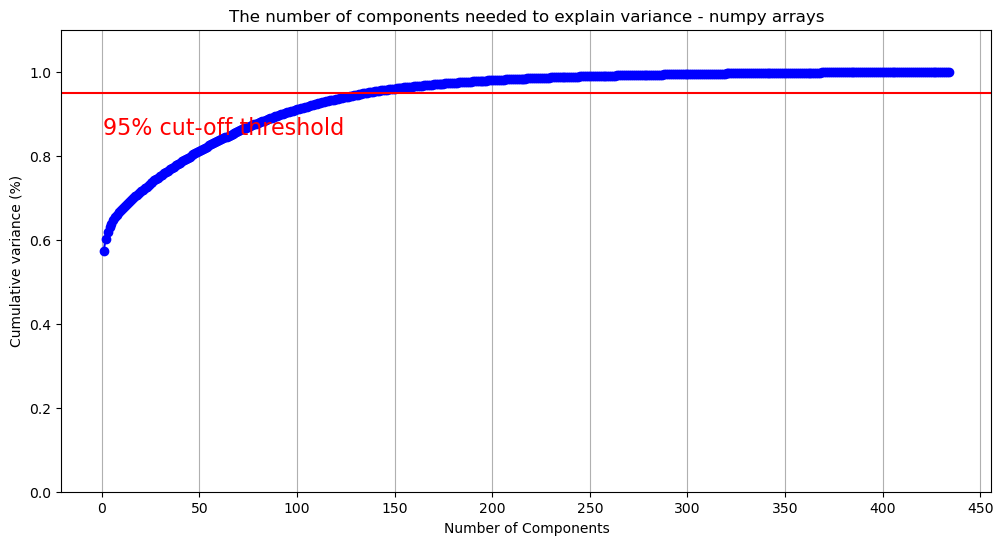

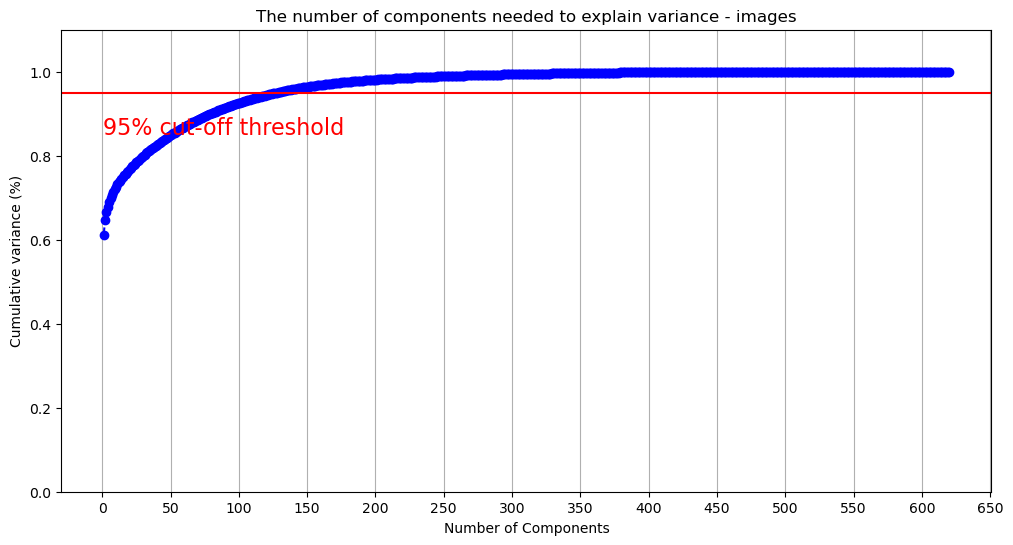

In [20]:
show_explained_variance(df_to_cluster, 'numpy arrays')
show_explained_variance(df_to_cluster_imgs, 'images')

In [21]:
def execute_pca(df, n_components=15):
    pca = PCA(n_components=n_components)
    pca.fit(df)

    explained_variance = pca.explained_variance_ratio_
    print("Sum of Explained Variance:", sum(explained_variance))
    
    pca_data = pca.transform(df)
    pca_columns = [f'PCA_{i + 1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_data, columns=pca_columns)
    return pca_df

In [115]:
pca_df = execute_pca(df_to_cluster, 125)
pca_imgs_df = execute_pca(df_to_cluster_imgs, 125)

# pca_img_df

Sum of Explained Variance: 0.9396401794341691
Sum of Explained Variance: 0.9477088862015439


## Estimate number of clusters

In [116]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV
from fcmeans import FCM
from scipy.cluster.hierarchy import dendrogram, linkage

### Elbow method

In [117]:
def elbow_method(X, max_clusters, estimator, title, estimator_params={}):
    inertia = list()
    for i in range(2, max_clusters):
        clusterer = estimator(n_clusters = i, **estimator_params)
        clusterer.fit(X)
        inertia.append(clusterer.inertia_)

    plt.plot(range(2, max_clusters), inertia, marker='o')
    plt.title(f'Elbow Method - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

### Silhouette analysis

In [118]:
def plot_silhouette_diagram(X, n_clusters, cluster_labels, silhouette_avg, clusterer):
    if isinstance(X, pd.DataFrame):
        X = X.values
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {n_clusters} clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Title of the entire plot
    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

def silhouette_analysis(X, max_clusters, estimator, title, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            clusterer.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
#         print(f'For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}')
        scores[n_clusters] = silhouette_avg
        
        # TODO: PLOT THEM TO GET SOME COOL DIAGRAMS
#         plot_silhouette_diagram(X, n_clusters, cluster_labels, silhouette_avg, clusterer)
        
    plt.plot(range_n_clusters, list(scores.values()), marker='o')
    plt.title(f'Silhouette analysis - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.show()
        
    return scores

def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X, cluster_labels)

### Davies Bouldin analysis

In [119]:
def davies_bouldin_analysis(X, max_clusters, estimator, title, estimator_params={}):
    range_n_clusters =  list(range(2, max_clusters + 1))
    scores = {}
    
    for n_clusters in range_n_clusters:
        clusterer = estimator(n_clusters=n_clusters, **estimator_params)
        if (estimator == FCM):
            estimator.fit(X)
            cluster_labels = clusterer.predict(X)
        else:
            cluster_labels = clusterer.fit_predict(X)
            
        db_score = davies_bouldin_score(X, cluster_labels)
        scores[n_clusters] = db_score

    plt.plot(range_n_clusters, list(scores.values()), marker='o')
    plt.title(f'Davies-Bouldin Index - {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Davies-Bouldin score')
    plt.show()

    return scores

### Estimates

In [120]:
def sort_scores(scores, reverse=True):
    return sorted(scores.items(), key=lambda x: x[1], reverse=reverse)


def print_top_n_scores(scores, n=5):
    print(f"Top {n} scores: ")
    for n, score in scores[:n]:
        print(f"{n}: {score}")
    print()

        
def get_top_n_scores(scores, n=3):     
    return [num_clusters for num_clusters, _ in scores[:n]]

        
def chose_n_clusters(top_n_scores_1, top_n_scores_2, title):
    chosen_n_clusters = list(set(top_n_scores_1) & set(top_n_scores_2))

    # add number of unique labels to chosen n clusters
    if NUMBER_UNIQUE_LABELS is not None:
        chosen_n_clusters.append(NUMBER_UNIQUE_LABELS)

    print(f"Chosen {title} n clusters: {chosen_n_clusters}")
    return chosen_n_clusters

    
def perform_cluster_estimations():
    params = {
        'n_init': 'auto',
        'random_state': 23,
    }
    
    # -- ELBOW -- 
    print("ELBOW")
#     scores = elbow_method(df_to_cluster, 15, KMeans, "original df arrays", params)
    el_a_scores = elbow_method(pca_df, 15, KMeans, "pca df arrays", params)
#     scores = elbow_method(df_to_cluster_imgs, 15, KMeans, "original df imgs", params)
    el_i_scores = elbow_method(pca_imgs_df, 15, KMeans, "pca df imgs", params)
                  
    # -- SILHOUETTE --
    print("SILHOUETTE")
#     scores = silhouette_analysis(df_to_cluster, 15, KMeans, "original df arrays", params)
#     scores = silhouette_analysis(df_to_cluster_imgs, 15, KMeans, "original df imgs", params)
    s_a_scores = sort_scores(silhouette_analysis(pca_df, 15, KMeans, "pca df arrays", params))
    print_top_n_scores(s_a_scores)

    s_i_scores = sort_scores(silhouette_analysis(pca_imgs_df, 15, KMeans, "pca df imgs", params))
    print_top_n_scores(s_i_scores)
    
        
    # -- DAVIES BOULDIN --
    print("DAVIES BOULDIN")
#     scores = davies_bouldin_analysis(df_to_cluster, 15, KMeans, "original df arrays", params)
#     scores = davies_bouldin_analysis(df_to_cluster_imgs, 15, KMeans, "original df imgs", params)
    db_a_scores = sort_scores(davies_bouldin_analysis(pca_df, 15, KMeans, "pca df arrays", params), reverse=False)
    print_top_n_scores(db_a_scores)

    db_i_scores = sort_scores(davies_bouldin_analysis(pca_imgs_df, 15, KMeans, "pca df imgs", params), reverse=False)
    print_top_n_scores(db_i_scores)    
    
    chosen_n_clusters_arrays = chose_n_clusters(get_top_n_scores(s_a_scores), get_top_n_scores(db_a_scores), 'arrays')
    chosen_n_clusters_images = chose_n_clusters(get_top_n_scores(s_i_scores), get_top_n_scores(db_i_scores), 'images')
    
    return chosen_n_clusters_arrays, chosen_n_clusters_images

ELBOW


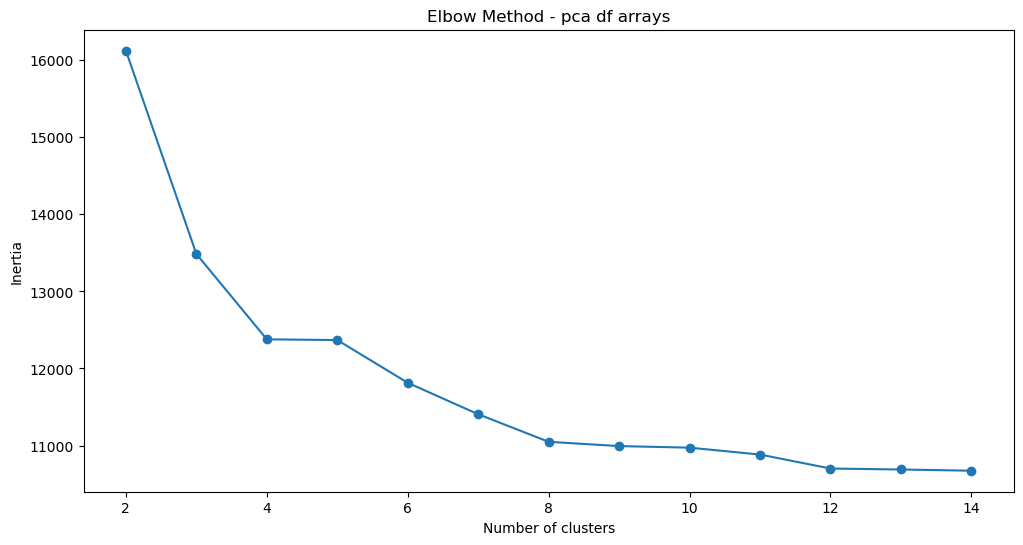

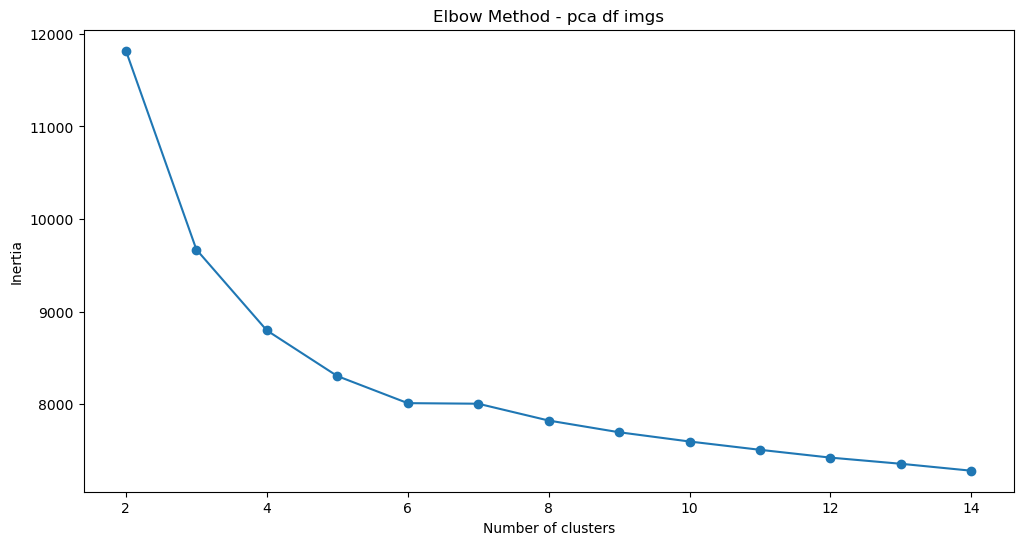

SILHOUETTE


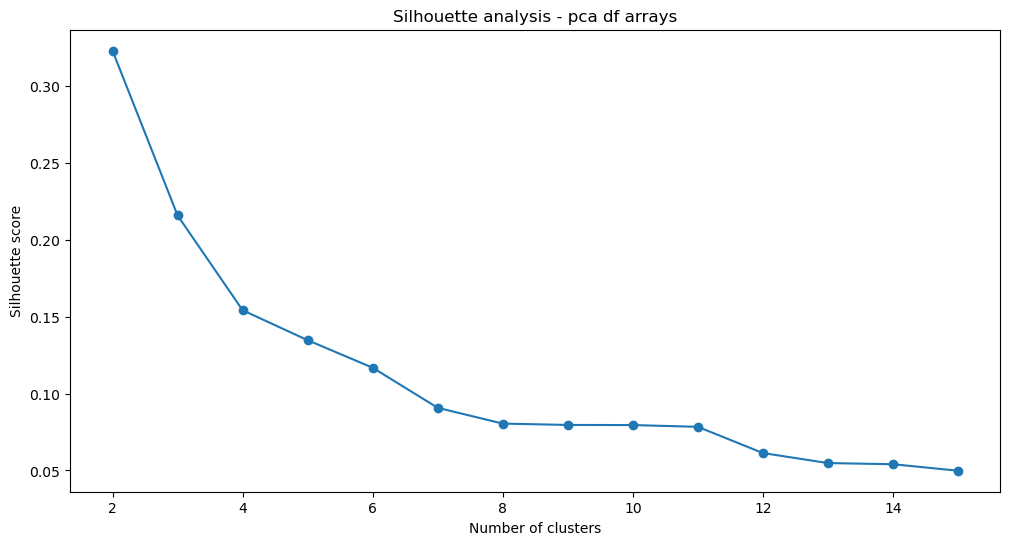

Top 5 scores: 
2: 0.3230584084303123
3: 0.21586983655359612
4: 0.15421931379169362
5: 0.13471620841296017
6: 0.1168003970594684



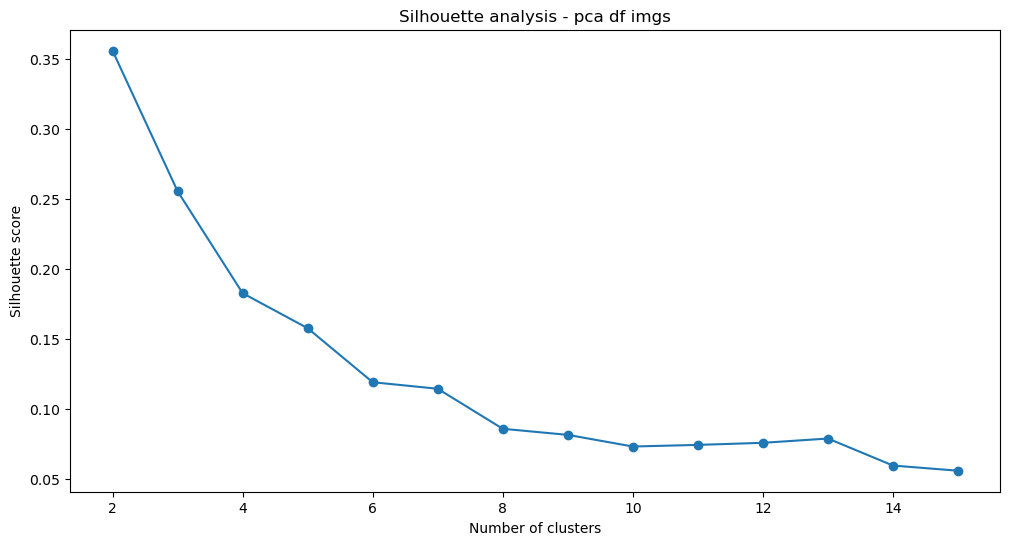

Top 5 scores: 
2: 0.35571695937934344
3: 0.2553545733967915
4: 0.1825286163469179
5: 0.15751003588282586
6: 0.11891739095125321

DAVIES BOULDIN


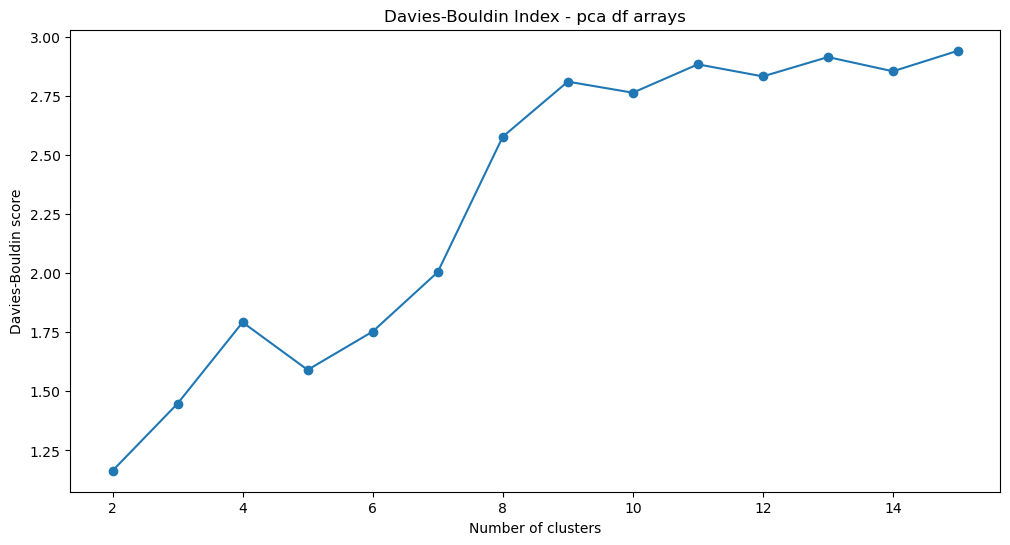

Top 5 scores: 
2: 1.1643763905193132
3: 1.4484690598056538
5: 1.5909920650540748
6: 1.753029978343534
4: 1.792137267133169



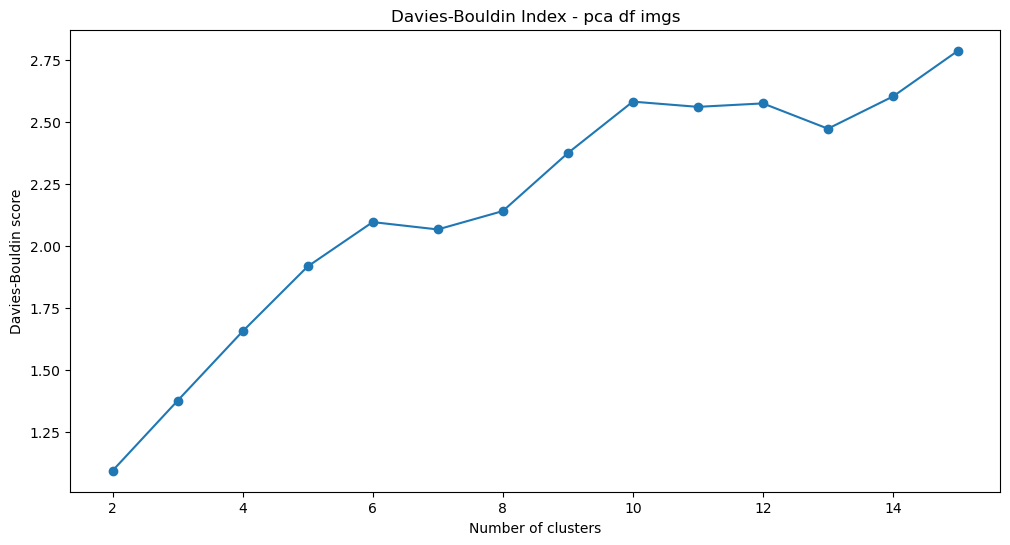

Top 5 scores: 
2: 1.092921135989284
3: 1.3754120494957816
4: 1.655203489866346
5: 1.916940089449572
7: 2.0663930997879727

Chosen arrays n clusters: [2, 3, 9]
Chosen images n clusters: [2, 3, 4, 9]


In [121]:
chosen_n_clusters_arr, chosen_n_clusters_imgs = perform_cluster_estimations()

### Cluster visulisation

In [136]:
def visualise_clusters(labels, title, df, cluster_names=None):
    pca_to_visualise_df = df[["PCA_1", "PCA_2"]]
    
    plt.figure(figsize=(12, 8))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels) + 1)]

    if cluster_names is not None and len(cluster_names) == len(unique_labels):
        label_mapping = dict(zip(unique_labels, cluster_names))
    else:
        label_mapping = {k: f'Cluster {k}' for k in unique_labels}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
    #         Black used for noise points
    #         col = [0, 0, 0, 1]
            continue

        class_member_mask = (labels == k)

        xy = pca_to_visualise_df[class_member_mask]
        plt.plot(
            xy['PCA_1'], 
            xy['PCA_2'], 
            'o', 
            markerfacecolor=tuple(col),
            markeredgecolor='k', 
            markeredgewidth=0.8,
            markersize=10,
            alpha=0.8,
            label=label_mapping[k]
        )

    plt.title(f'{title} clustering')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

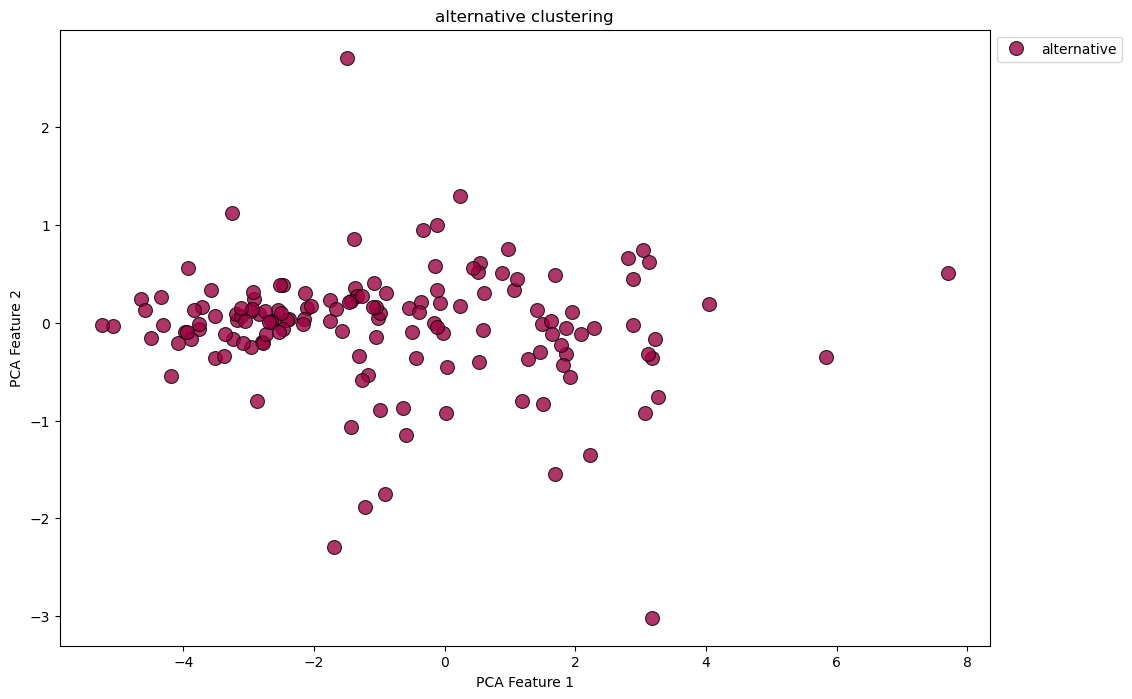

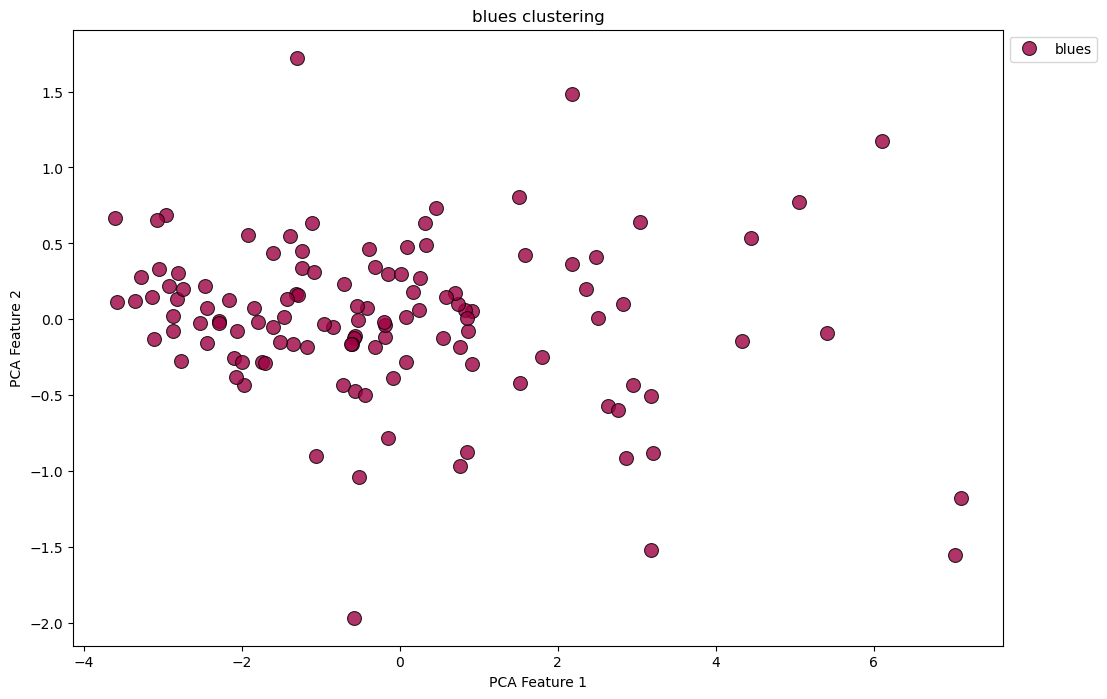

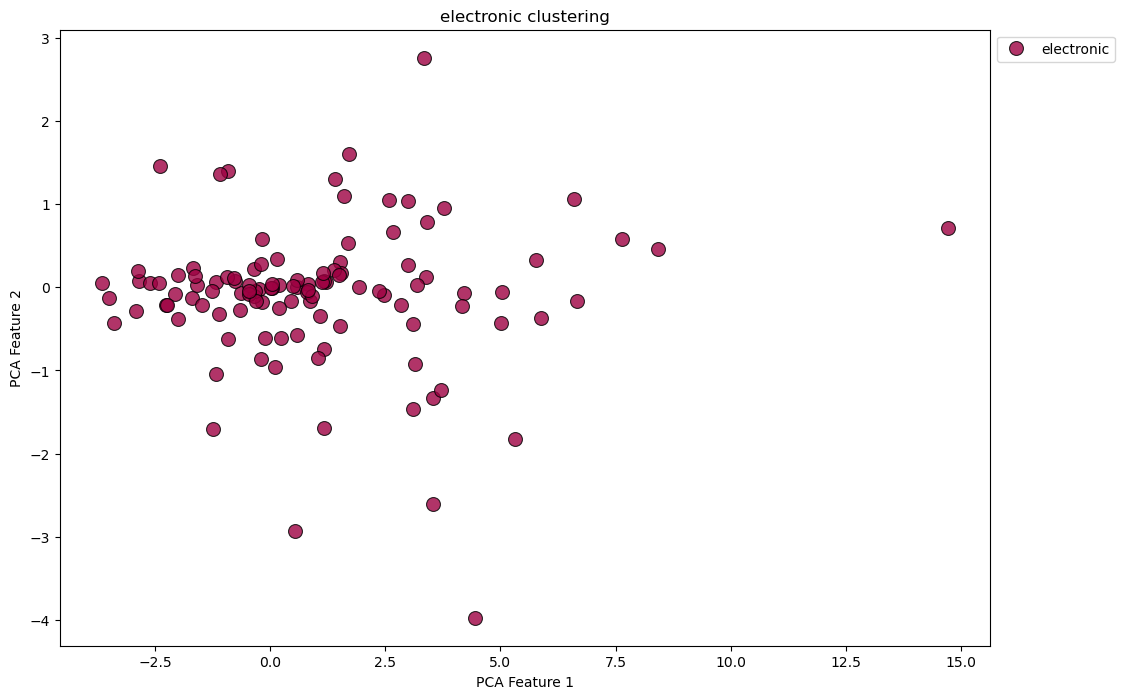

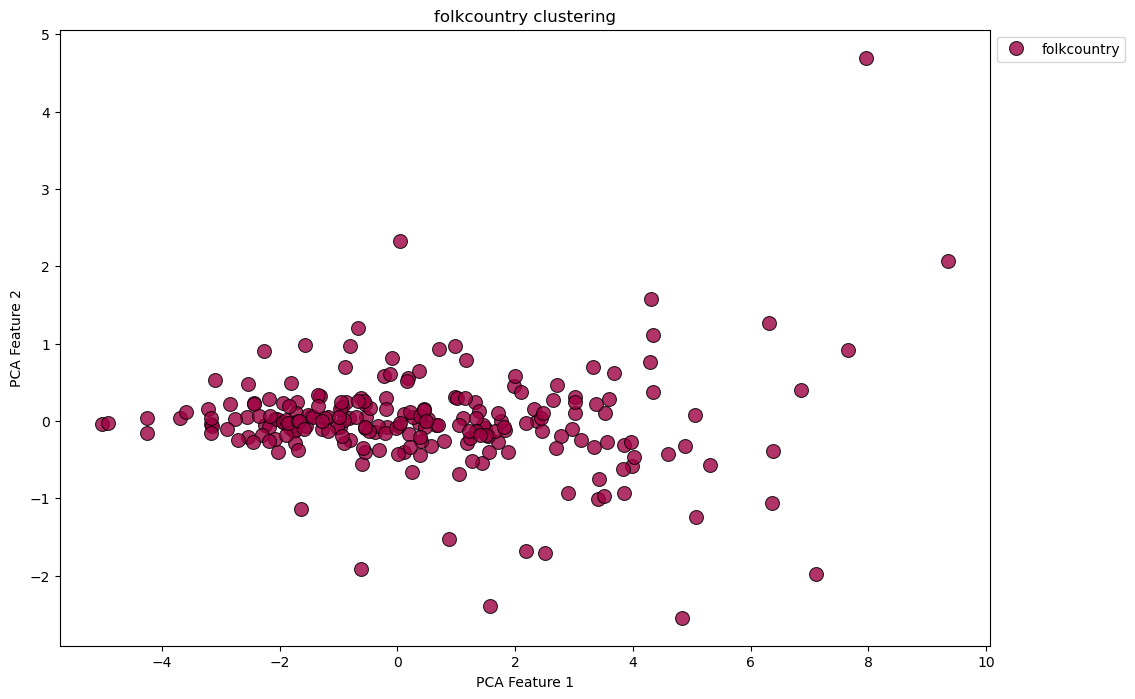

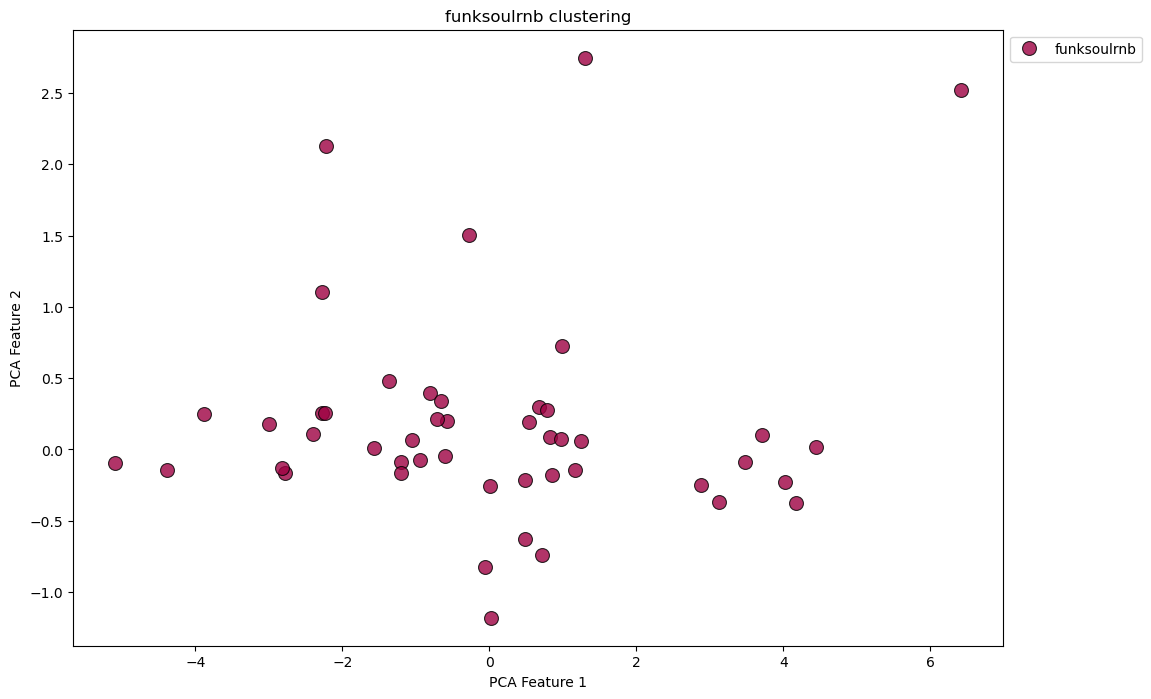

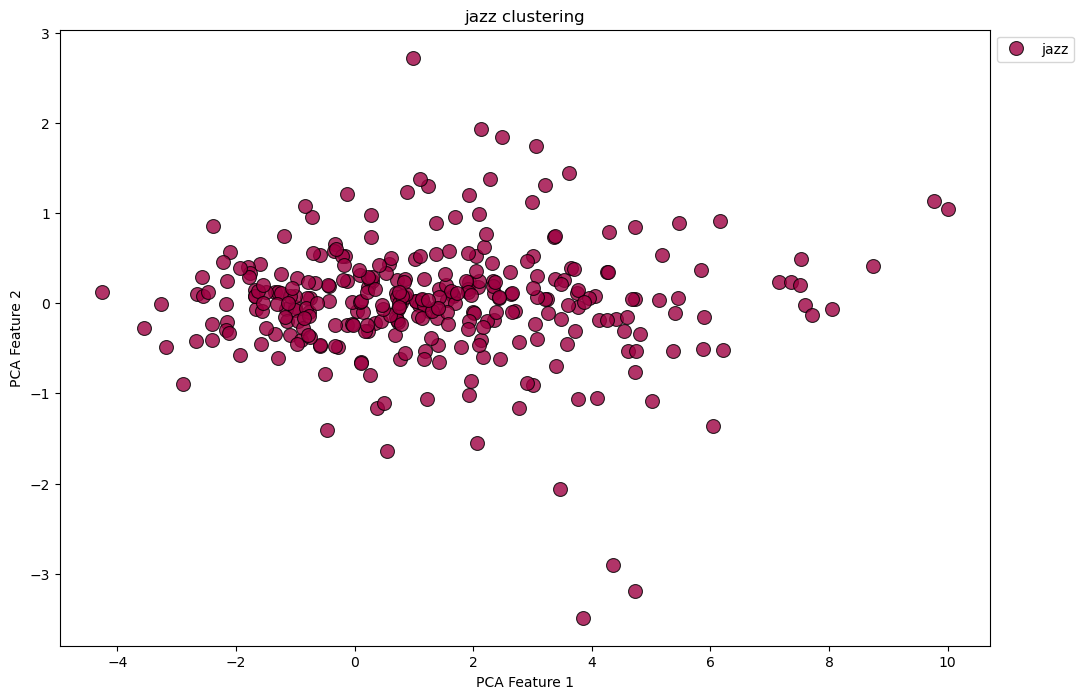

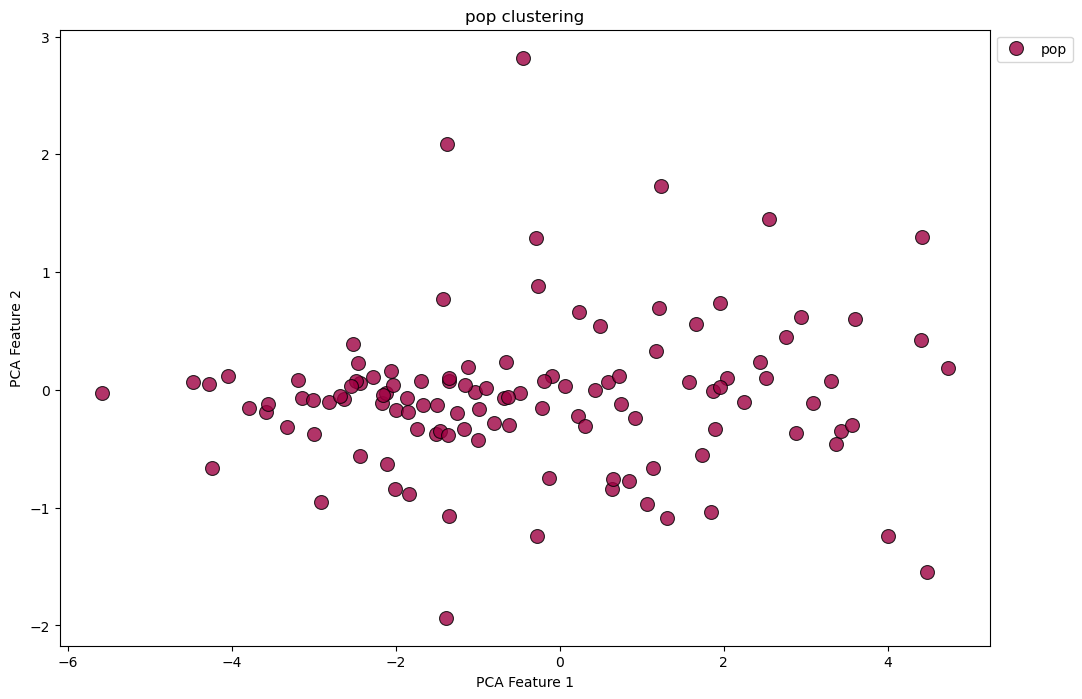

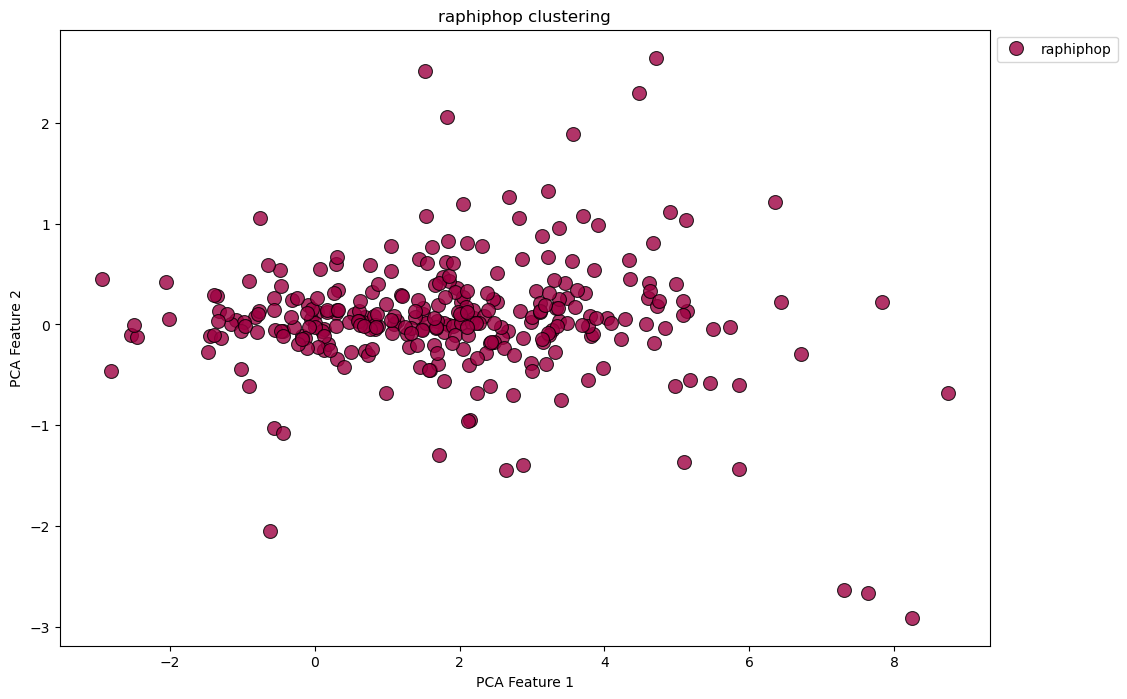

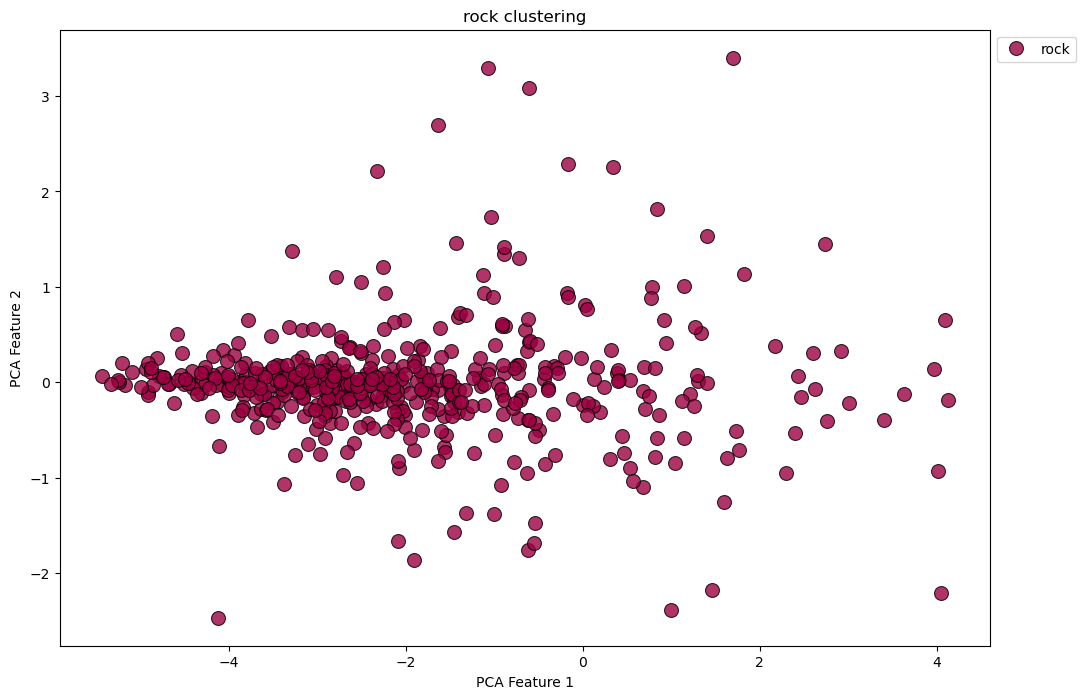

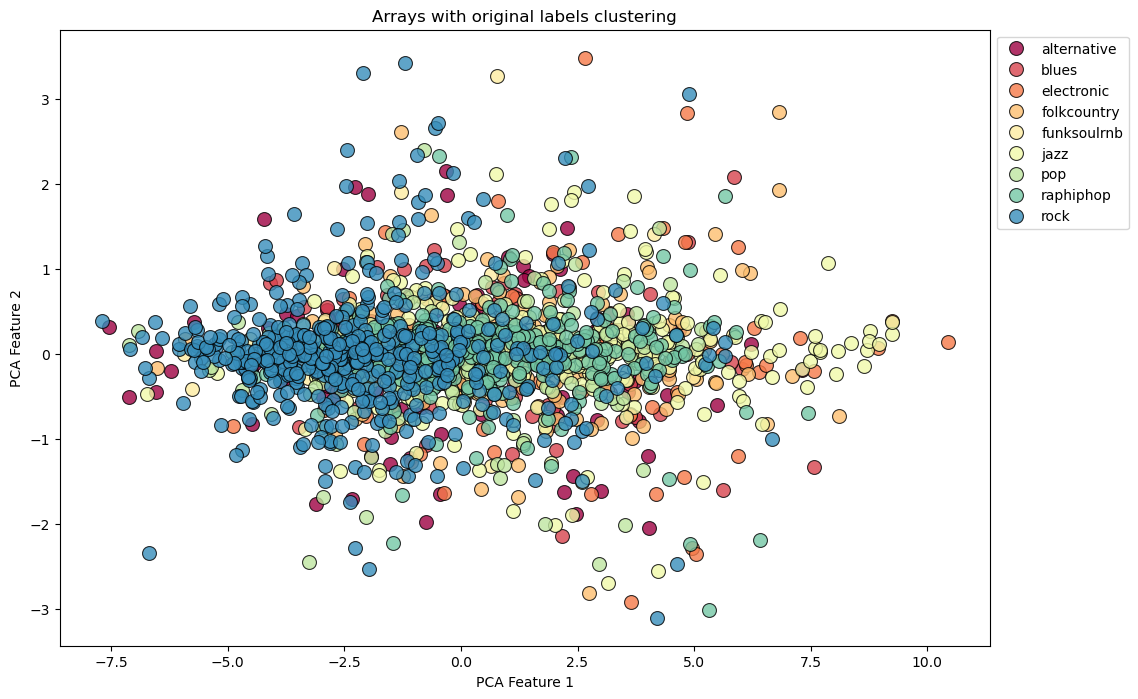

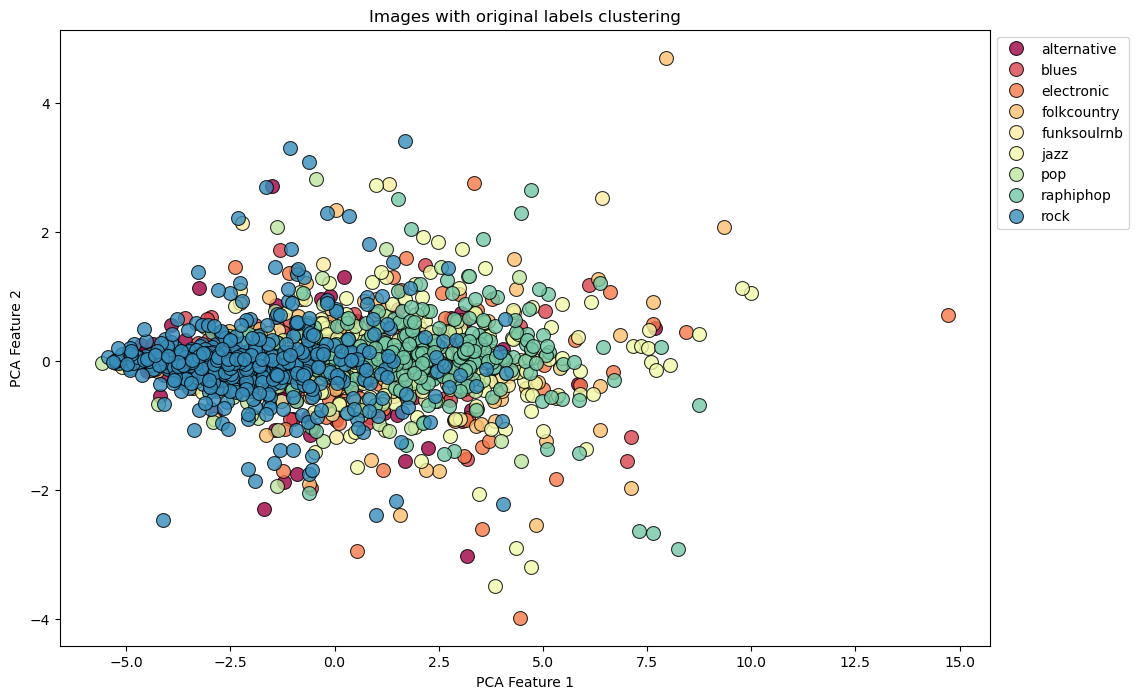

In [138]:
# check if column named label exist in df
if 'label' in df.columns:
    for cluster_name in CLUSTER_NAMES:
        cluster_mask = df['label'] == cluster_name
        cluster_labels = NUMERIC_LABELS[cluster_mask]
        cluster_df = pca_imgs_df[cluster_mask]
        visualise_clusters(cluster_labels, cluster_name, cluster_df, cluster_names=[cluster_name])
        
    visualise_clusters(NUMERIC_LABELS, 'Arrays with original labels', pca_df, cluster_names=CLUSTER_NAMES)
    visualise_clusters(NUMERIC_LABELS, 'Images with original labels', pca_imgs_df, cluster_names=CLUSTER_NAMES)    

### DBSCAN

In [81]:
def perform_dbscan(
    df, 
    title='DBSCAN', 
    param_grid={
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'eps': [0.2, 0.5, 1, 2, 3],
        'leaf_size': [2, 5, 10, 30],
        'min_samples': [3, 5, 10]
    }):
    dbscan = DBSCAN()
    
    # Find best params
    print("Searching for best params...")
    grid_search = GridSearchCV(
        estimator=dbscan, 
        param_grid=param_grid, 
        cv=[(slice(None), slice(None))],
        scoring=cv_silhouette_scorer,
        n_jobs=-1
    ).fit(df)

    best_params = grid_search.best_params_
    print("Best parameters found:", best_params)
    print("Best score:", grid_search.best_score_)

    # Perform clustering
    dbscan = DBSCAN(
        eps=1.0,
        min_samples=best_params['min_samples'],
        algorithm=best_params['algorithm'],
        leaf_size=best_params['leaf_size']
    ).fit(df)

    labels = dbscan.labels_
    print(f"dbscan cluster data into {len(set(labels))} clusters")
    
    # Visualise results
    visualise_clusters(labels, title, df)

Searching for best params...
Best parameters found: {'algorithm': 'auto', 'eps': 3, 'leaf_size': 2, 'min_samples': 3}
Best score: 0.2641228042608624
dbscan cluster data into 2 clusters


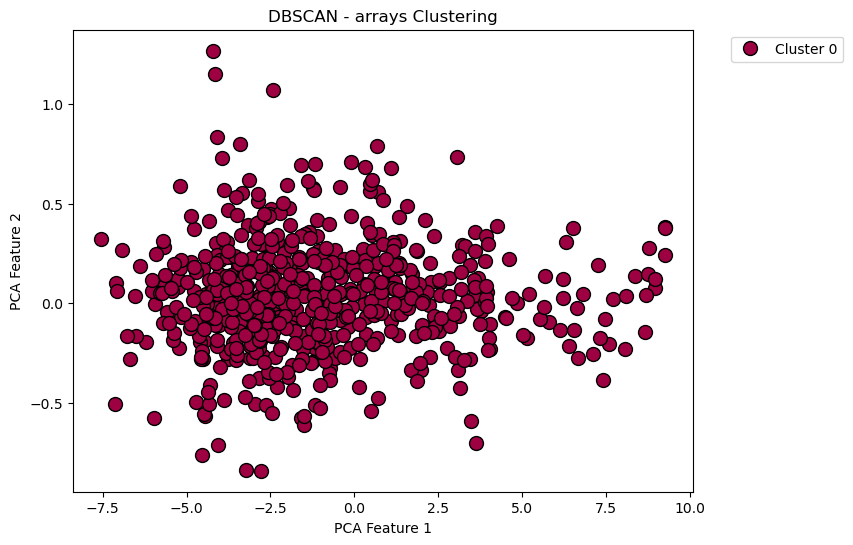

Searching for best params...
Best parameters found: {'algorithm': 'auto', 'eps': 3, 'leaf_size': 2, 'min_samples': 5}
Best score: 0.5236051619768076
dbscan cluster data into 3 clusters


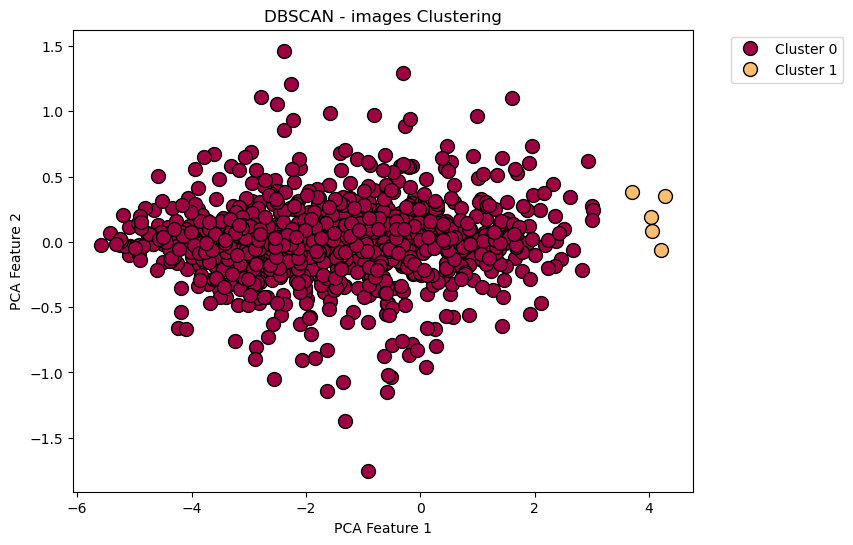

In [82]:
perform_dbscan(pca_df, 'DBSCAN - arrays')
perform_dbscan(pca_imgs_df, 'DBSCAN - images')

## KMeans

In [96]:
def perform_grid_search(estimator, df, chosen_n_clusters, param_grid, estimator_params={}):
    grid_search_scores = {}
    
    for n_clusters in chosen_n_clusters:
        print(f"Searching for best params for {n_clusters} clusters...")

        clusterer = estimator(**estimator_params, n_clusters=n_clusters)

        grid_search = GridSearchCV(
            estimator=clusterer, 
            param_grid=param_grid, 
            cv=[(slice(None), slice(None))],
            scoring=cv_silhouette_scorer,
            n_jobs=-1
        )
        grid_search.fit(df)

        grid_search_scores[n_clusters] = {
            "best_params": grid_search.best_params_,
            "best_score": grid_search.best_score_
        }
    
    return grid_search_scores

In [104]:
def perform_k_means(df, chosen_n_clusters, title=''):
    # Find best params for each n clusters
    estimator_params = { 'n_init': 'auto', 'random_state': 23}
    param_grid = {
        'init': ['k-means++', 'random'],
        'max_iter': [10, 15, 25, 50, 100, 200],
        'tol': [1e-2, 1e-3, 1e-4, 1e-5]
    }
    grid_search_scores = perform_grid_search(KMeans, df, chosen_n_clusters, param_grid, estimator_params)
    
    # Perform clustering for each n clusters
    for n in grid_search_scores:
        grid_search = grid_search_scores[n]
        print(f"Best params for {n} clusters: {grid_search['best_params']}")
        print(f"Best score {grid_search['best_score']}")
        
        print(f"Performing clustering for {n} clusters")
        kmeans = KMeans(
            random_state=23, 
            n_init='auto',
            n_clusters=n,
            init=grid_search['best_params']['init'],
            max_iter=grid_search['best_params']['max_iter'],
            tol=grid_search['best_params']['tol']
        ).fit(df)

        # Visualise results
        visualise_clusters(kmeans.labels_, f'KMeans {n} clusters - {title}', df)

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 4 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'init': 'k-means++', 'max_iter': 10, 'tol': 0.001}
Best score 0.4116243262097986
Performing clustering for 2 clusters


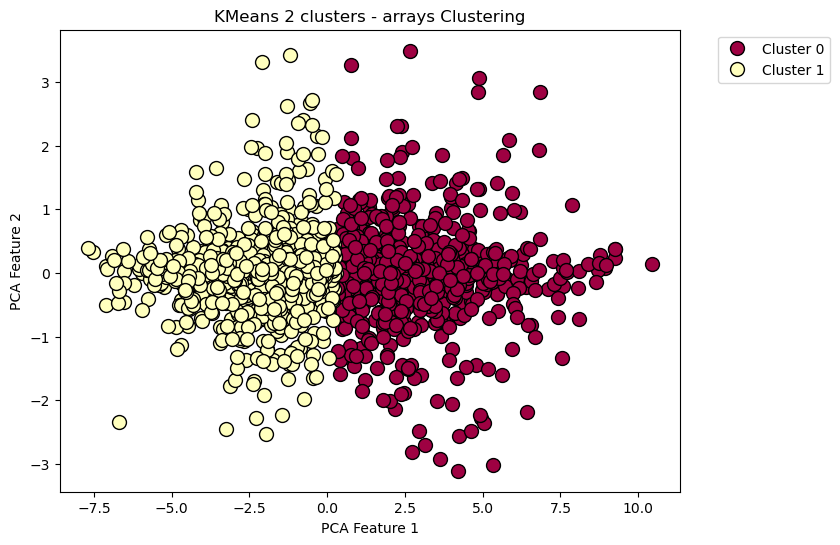

Best params for 3 clusters: {'init': 'random', 'max_iter': 10, 'tol': 0.001}
Best score 0.30873180215016016
Performing clustering for 3 clusters


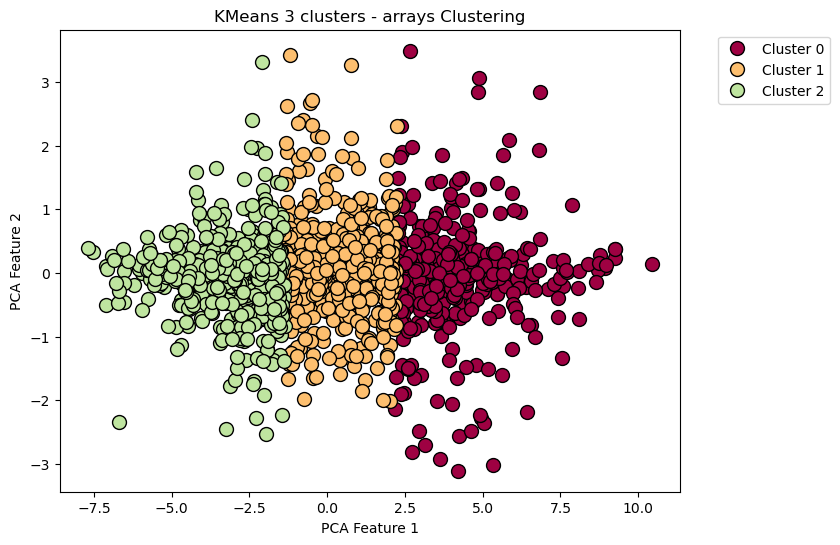

Best params for 4 clusters: {'init': 'random', 'max_iter': 10, 'tol': 0.01}
Best score 0.24472161289774963
Performing clustering for 4 clusters


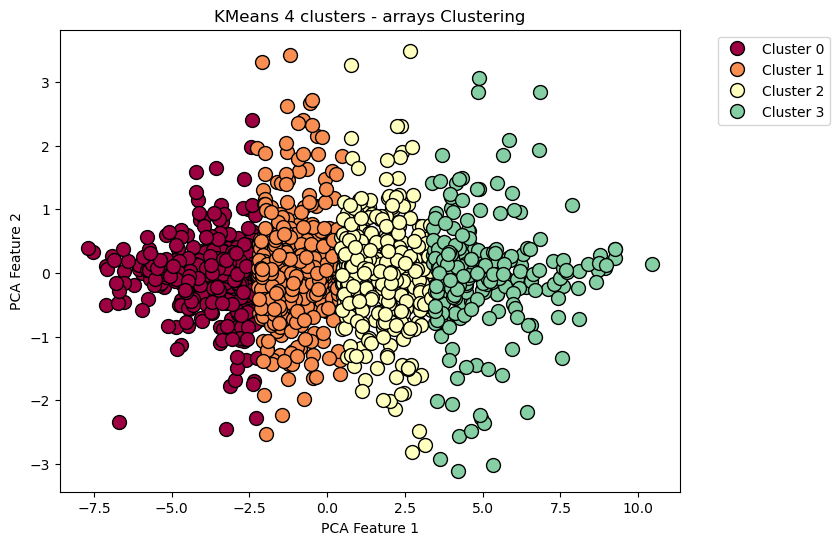

Best params for 9 clusters: {'init': 'k-means++', 'max_iter': 10, 'tol': 0.01}
Best score 0.1332200269483691
Performing clustering for 9 clusters


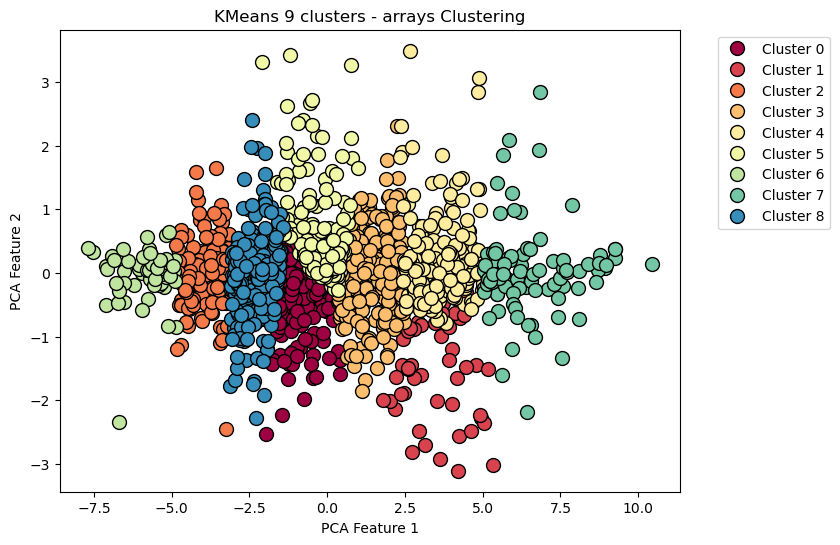

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 4 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'init': 'k-means++', 'max_iter': 10, 'tol': 0.001}
Best score 0.42797675375936234
Performing clustering for 2 clusters


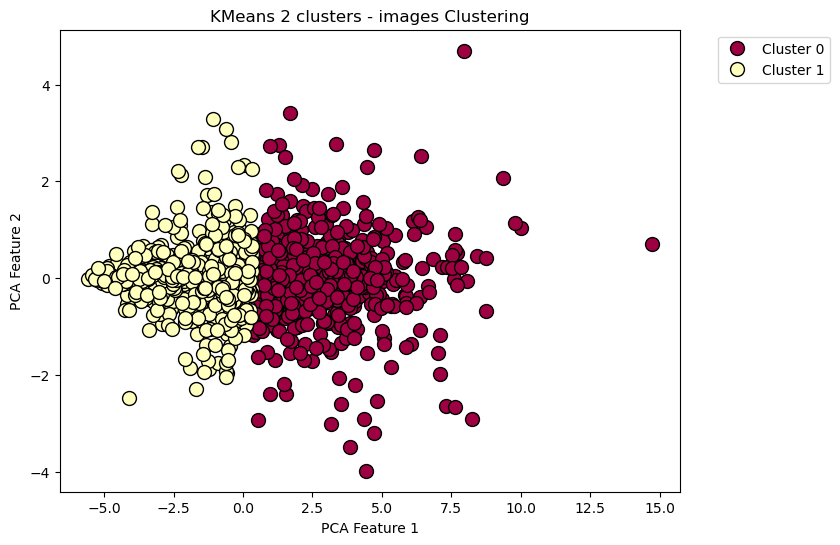

Best params for 3 clusters: {'init': 'random', 'max_iter': 25, 'tol': 1e-05}
Best score 0.33867878943200086
Performing clustering for 3 clusters


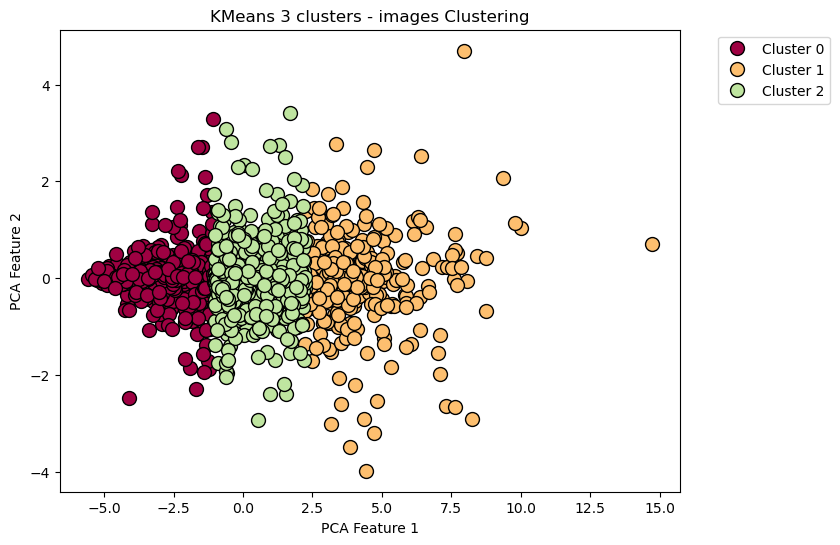

Best params for 4 clusters: {'init': 'random', 'max_iter': 10, 'tol': 0.01}
Best score 0.2792760379136802
Performing clustering for 4 clusters


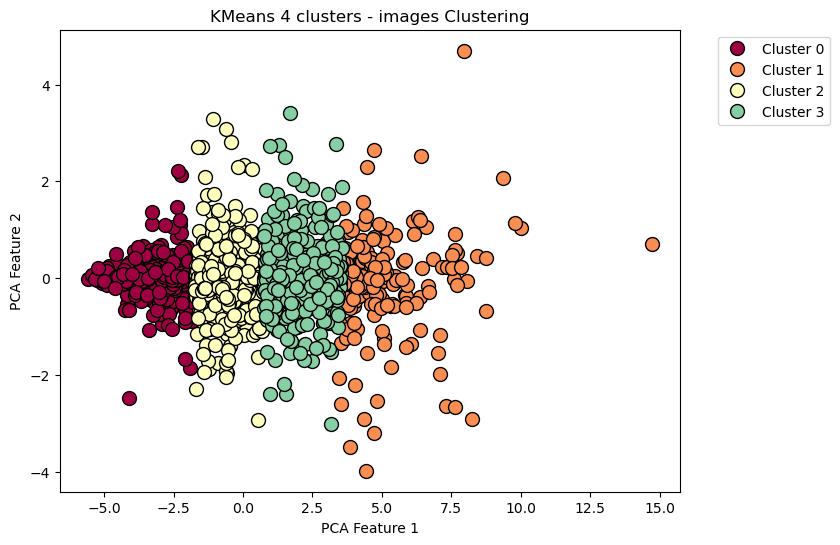

Best params for 9 clusters: {'init': 'k-means++', 'max_iter': 10, 'tol': 0.001}
Best score 0.1509650394152728
Performing clustering for 9 clusters


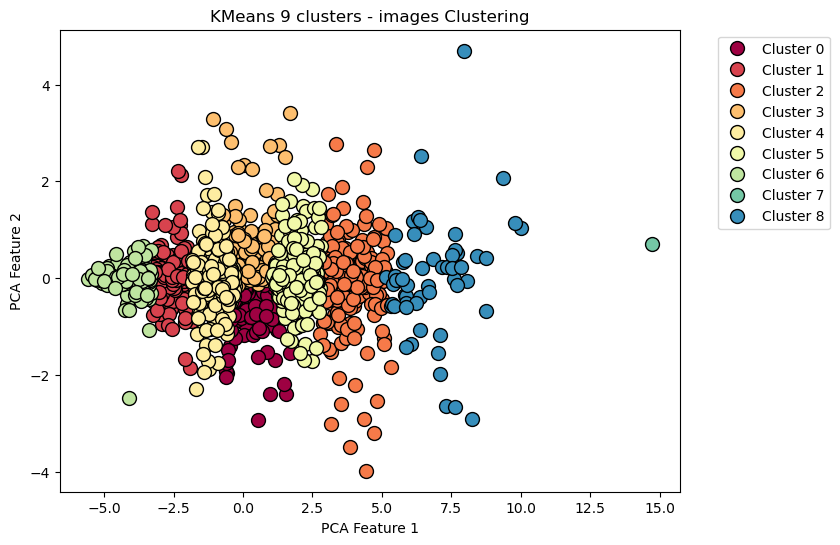

In [105]:
perform_k_means(pca_df, chosen_n_clusters_arr, title='arrays')
perform_k_means(pca_imgs_df, chosen_n_clusters_imgs, title='images')

### Agglomerative Clustering

In [111]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                # Leaf node
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [118]:
def perform_agglomerative(df, chosen_n_clusters, title):
    # Plot dendrogram
    agglo = AgglomerativeClustering(
                n_clusters=None,
                compute_distances=True,
                distance_threshold=0
            ).fit(df)
    plt.title(f'Hierarchical Clustering Dendrogram - {title}')
    # Plot the top three levels of the dendrogram
    plot_dendrogram(agglo, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
    # Find best params for each n clusters
    param_grid = {'linkage': ['ward', 'complete', 'average', 'single']}
    grid_search_scores = perform_grid_search(AgglomerativeClustering, df, chosen_n_clusters, param_grid)

    # Perform clustering for each n clusters
    for n in grid_search_scores:
        grid_search = grid_search_scores[n]
        print(f"Best params for {n} clusters: {grid_search['best_params']}")
        print(f"Best score {grid_search['best_score']}")
        
        print(f"Performing clustering for {n} clusters")
        agglo = AgglomerativeClustering(
            n_clusters=n,
            compute_distances=True,
            linkage=grid_search['best_params']['linkage']
        ).fit(df)

        # Visualise results
        visualise_clusters(agglo.labels_, f'Agglomerative {n} clusters - {title}', df)    

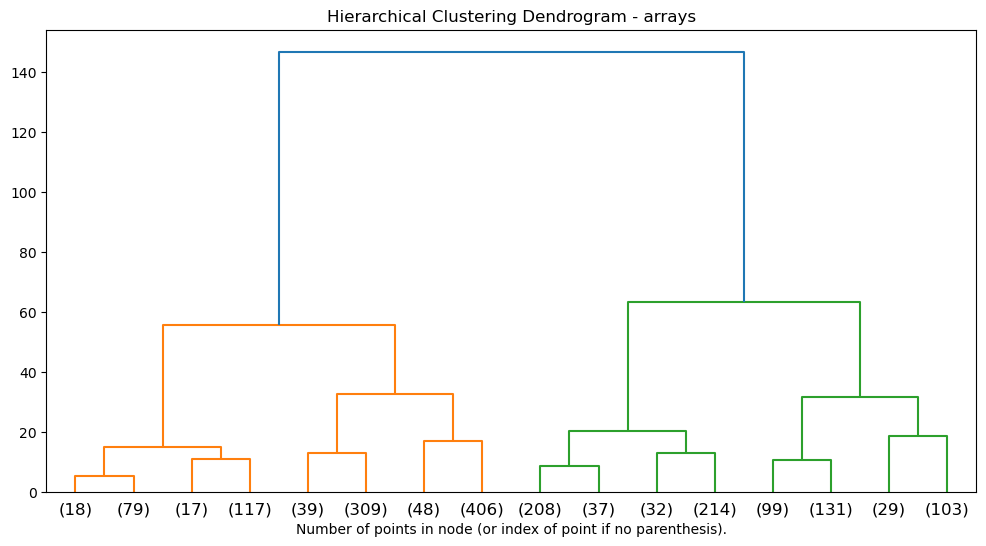

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 4 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'linkage': 'average'}
Best score 0.40802906542161615
Performing clustering for 2 clusters


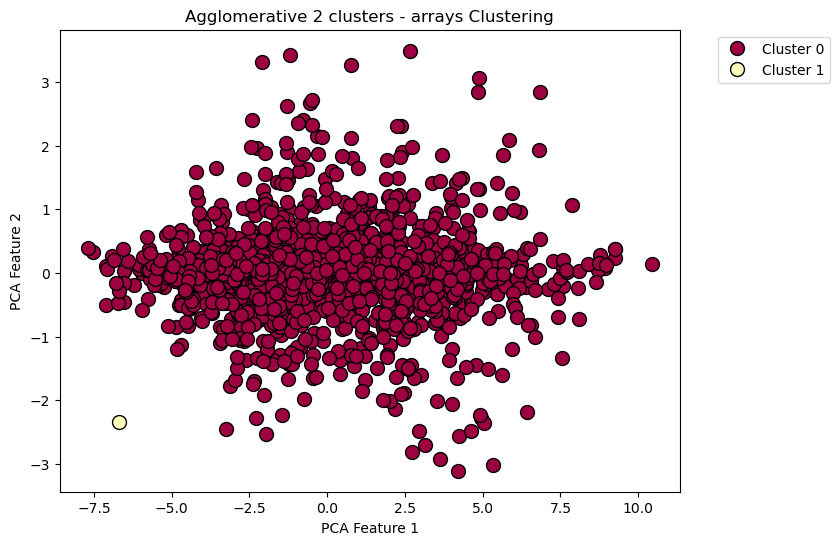

Best params for 3 clusters: {'linkage': 'average'}
Best score 0.3421431830567723
Performing clustering for 3 clusters


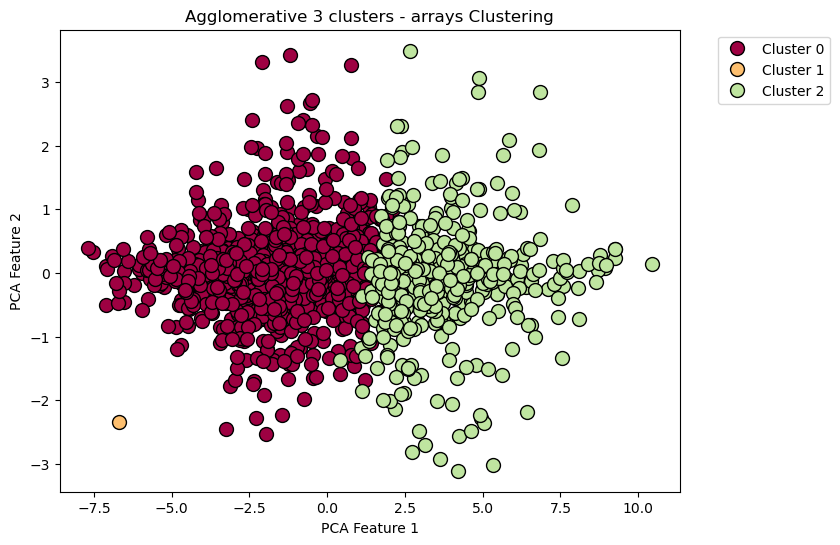

Best params for 4 clusters: {'linkage': 'average'}
Best score 0.3167012658809339
Performing clustering for 4 clusters


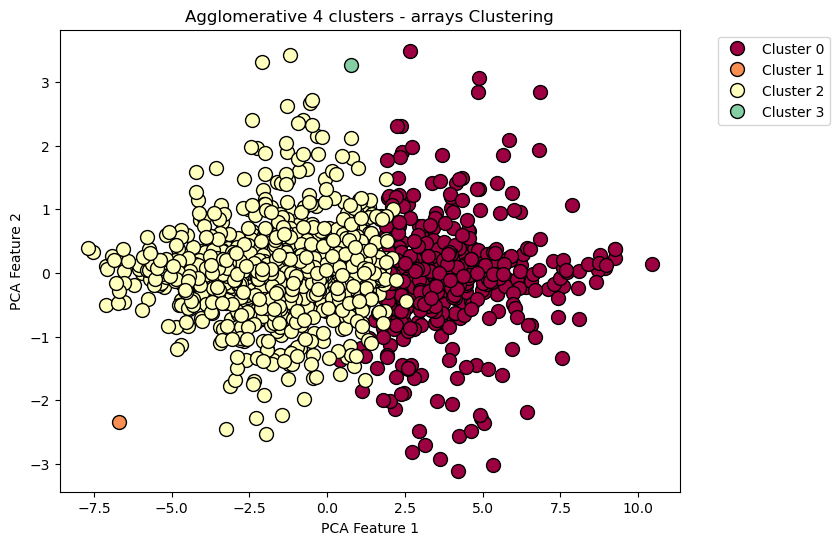

Best params for 9 clusters: {'linkage': 'average'}
Best score 0.22714811593756234
Performing clustering for 9 clusters


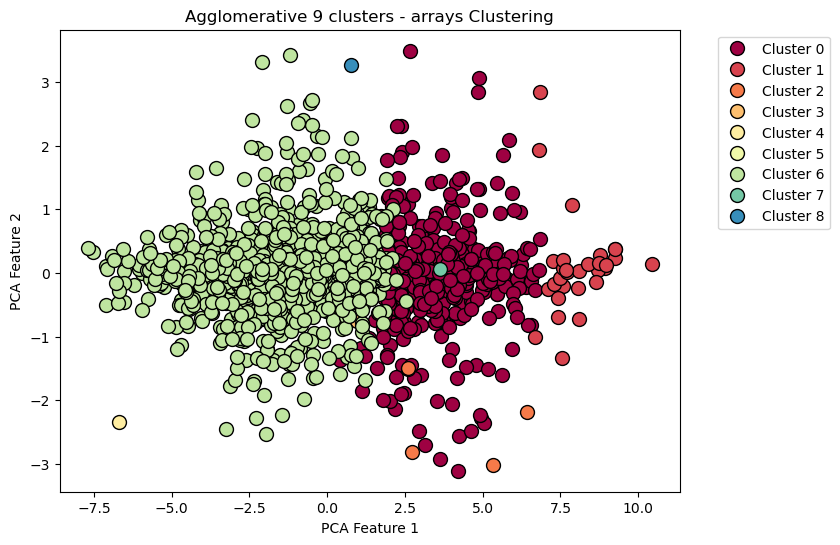

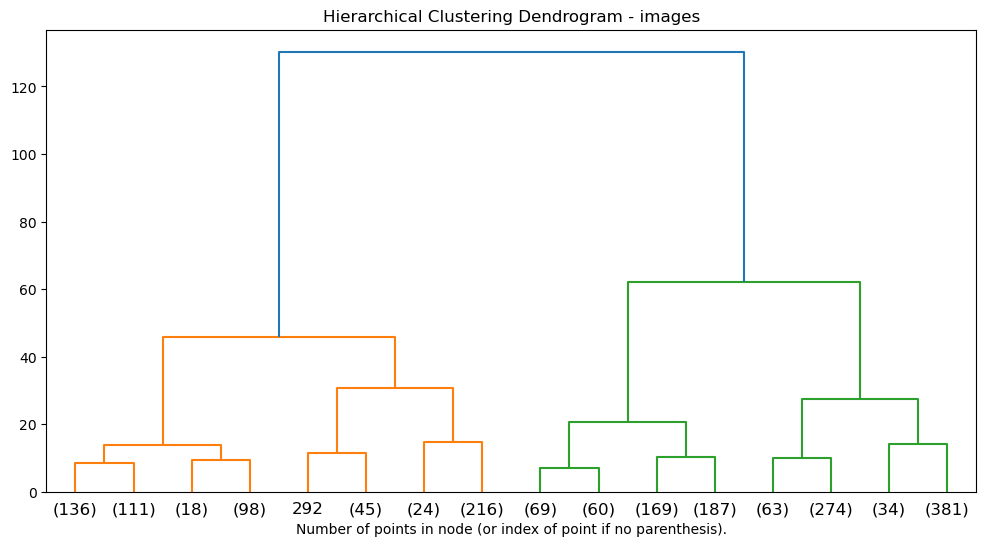

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 4 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'linkage': 'average'}
Best score 0.7391956637859146
Performing clustering for 2 clusters


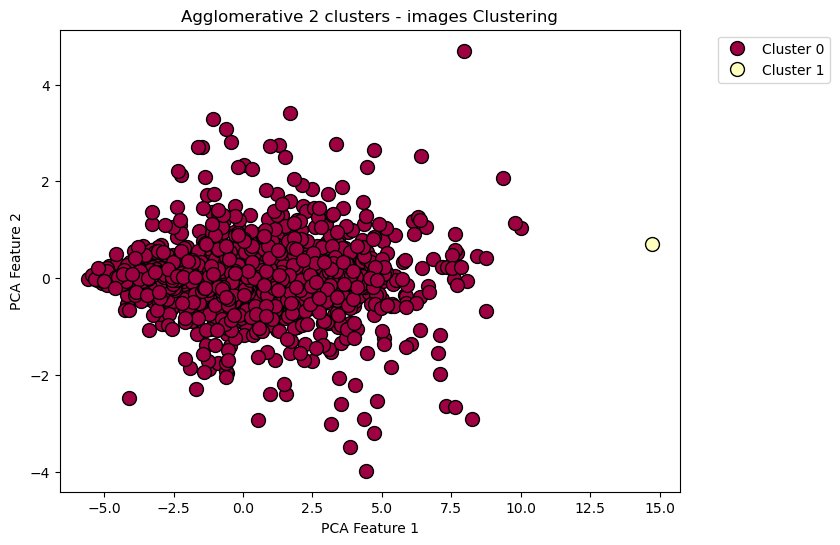

Best params for 3 clusters: {'linkage': 'single'}
Best score 0.6250653668244908
Performing clustering for 3 clusters


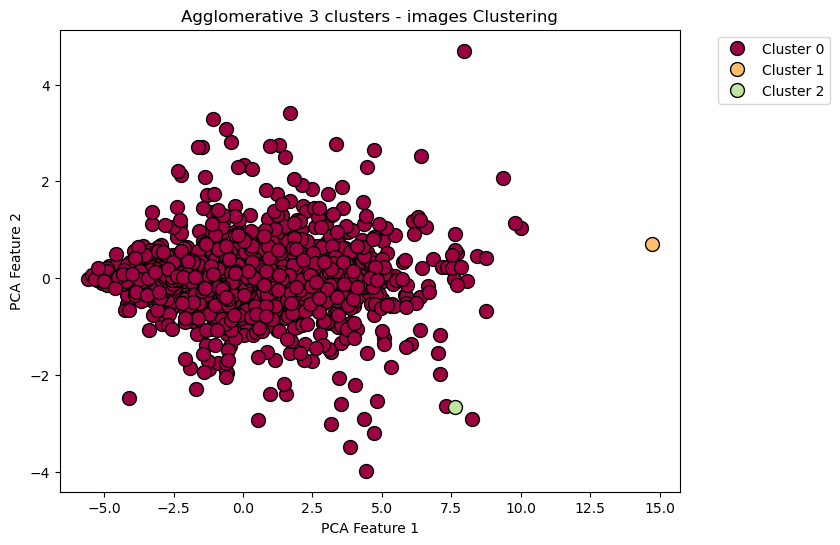

Best params for 4 clusters: {'linkage': 'average'}
Best score 0.5011208524695098
Performing clustering for 4 clusters


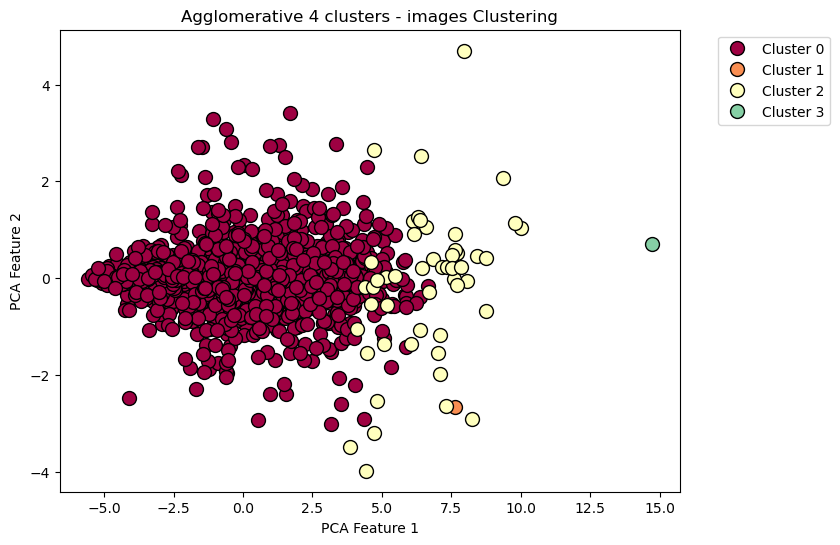

Best params for 9 clusters: {'linkage': 'average'}
Best score 0.40794793751984293
Performing clustering for 9 clusters


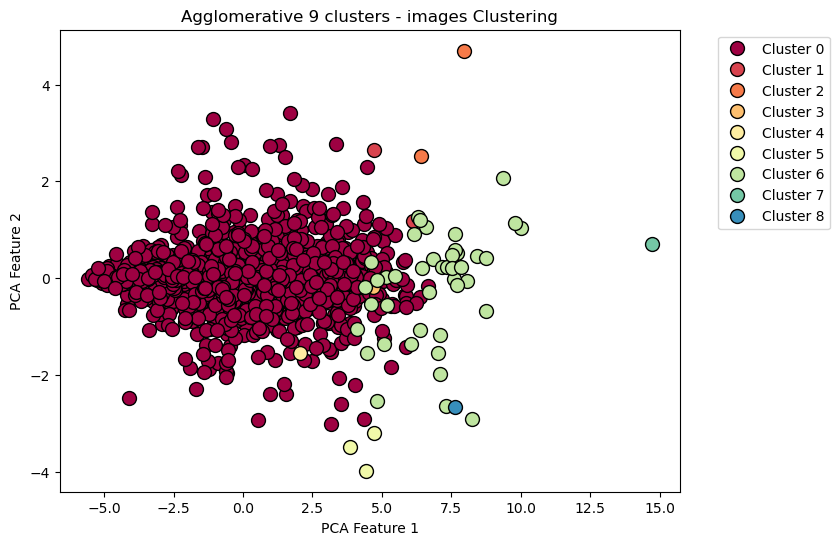

In [119]:
perform_agglomerative(pca_df, chosen_n_clusters_arr, 'arrays')
perform_agglomerative(pca_imgs_df, chosen_n_clusters_imgs, 'images')

### Fuzzy c-means

In [125]:
def fcm_grid_search(param_grid, n_clusters, df, estimator_params={}):
    best_params = None
    best_score = -np.inf
#     best_labels = None
#     best_centers = None
    
    print(f"Searching for best params for {n_clusters} clusters...")
    
    # Iterate over all parameter combinations
    for max_iter in param_grid['max_iter']:
        for m in param_grid['m']:
            for error in param_grid['error']:
                try:
                    # Perform FCM clustering
                    fcm = FCM(n_clusters=n_clusters, max_iter=max_iter, m=m, error=error, **estimator_params)
                    fcm.fit(df.values)
                    cluster_labels = fcm.predict(df.values)
                    cluster_centers = fcm.centers

                    # Evaluate clustering performance using silhouette score
                    silhouette_avg = silhouette_score(df, cluster_labels)
#                     print(f"max_iter: {max_iter}, m: {m}, error: {error}, silhouette_score: {silhouette_avg}")

                    if silhouette_avg > best_score:
                        best_score = silhouette_avg
                        best_params = {'max_iter': max_iter, 'm': m, 'error': error}
#                         best_labels = cluster_labels
#                         best_centers = cluster_centers
                    
                except (ZeroDivisionError, ValueError, FloatingPointError) as e:
                    print(f"Skipping parameters max_iter: {max_iter}, m: {m}, error: {error} due to error: {e}")

    grid_search_results = {"best_params": best_params, "best_score": best_score}
    return grid_search_results

In [129]:
def perform_c_means(df, chosen_n_clusters, title):
    # Find best params for each n clusters
    param_grid = {
        'max_iter': [50, 100, 150],
        'm': [1.1, 1.25, 1.5, 2],
        'error': [1e-2, 1e-3, 1e-4, 1e-5]
    }
    grid_search_scores = {}
    for n_clusters in chosen_n_clusters:
        grid_search_scores[n_clusters] = fcm_grid_search(
            param_grid, 
            n_clusters, 
            df, 
            estimator_params={'random_state': 23}
        )
        
    # Perform clustering for each n clusters
    for n in grid_search_scores:
        grid_search = grid_search_scores[n]
        print(f"Best params for {n} clusters: {grid_search['best_params']}")
        print(f"Best score {grid_search['best_score']}")
        
        print(f"Performing clustering for {n} clusters")
        cmeans = FCM(
            random_state=23, 
            n_clusters=n,
            max_iter=grid_search['best_params']['max_iter'],
            m=grid_search['best_params']['m'],
            error=grid_search['best_params']['error']
        )
        cmeans.fit(df.values)

        labels = cmeans.predict(df.values)
        
        pc = f"{cmeans.partition_coefficient:.3f}"
        pec = f"{cmeans.partition_entropy_coefficient:.3f}"

        # Visualise results
        visualise_clusters(labels, f'PC: {pc}, PEC: {pec}. Fuzzy c-means {n} clusters - {title}', df)

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 4 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'max_iter': 50, 'm': 1.25, 'error': 0.01}
Best score 0.41245666352005517
Performing clustering for 2 clusters


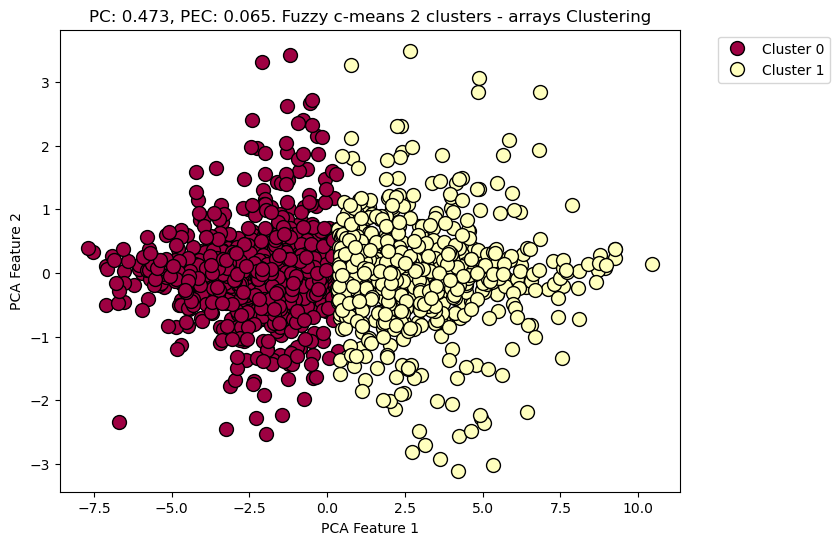

Best params for 3 clusters: {'max_iter': 50, 'm': 1.1, 'error': 0.01}
Best score 0.30807400623246595
Performing clustering for 3 clusters


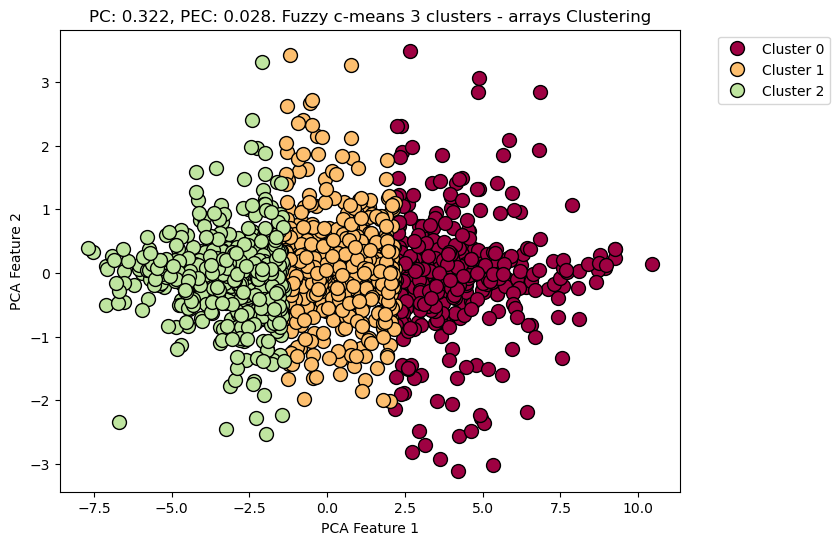

Best params for 4 clusters: {'max_iter': 50, 'm': 1.1, 'error': 0.01}
Best score 0.24382994531808735
Performing clustering for 4 clusters


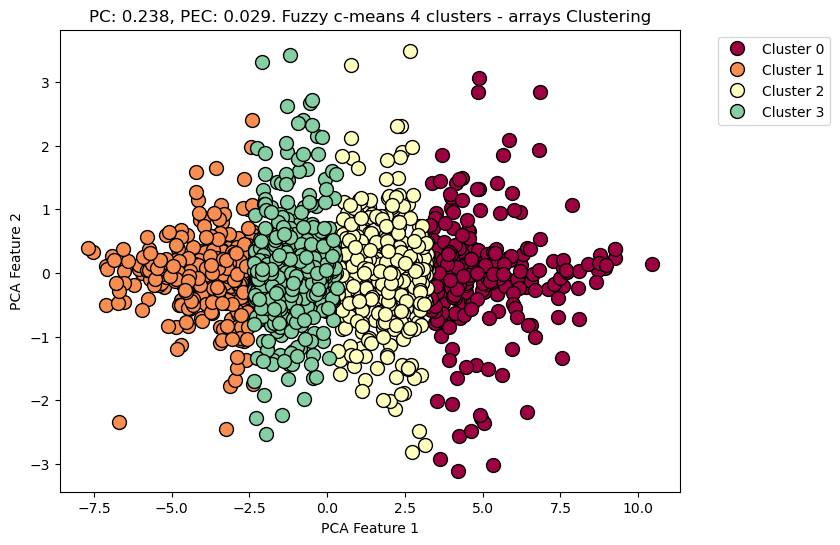

Best params for 9 clusters: {'max_iter': 150, 'm': 1.1, 'error': 0.001}
Best score 0.1281433034929538
Performing clustering for 9 clusters


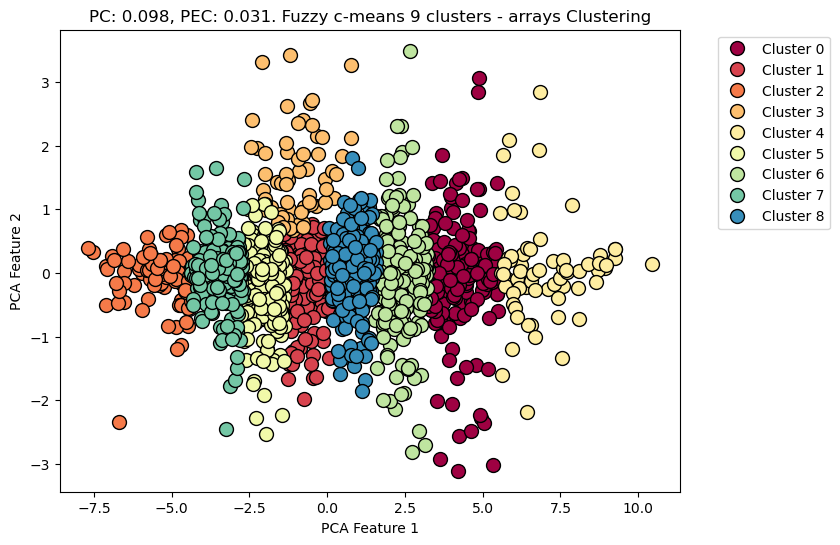

Searching for best params for 2 clusters...
Searching for best params for 3 clusters...
Searching for best params for 4 clusters...
Searching for best params for 9 clusters...
Best params for 2 clusters: {'max_iter': 50, 'm': 1.1, 'error': 0.01}
Best score 0.42797675375936234
Performing clustering for 2 clusters


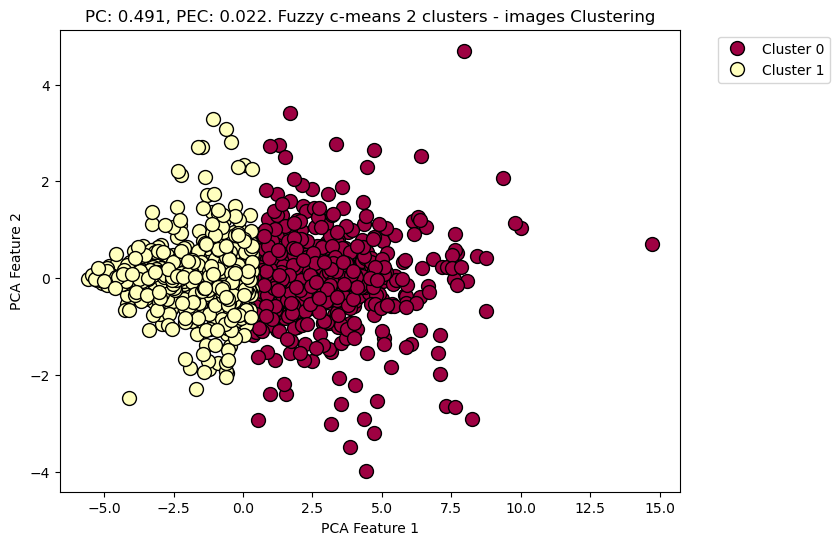

Best params for 3 clusters: {'max_iter': 50, 'm': 1.25, 'error': 0.01}
Best score 0.3381255720710288
Performing clustering for 3 clusters


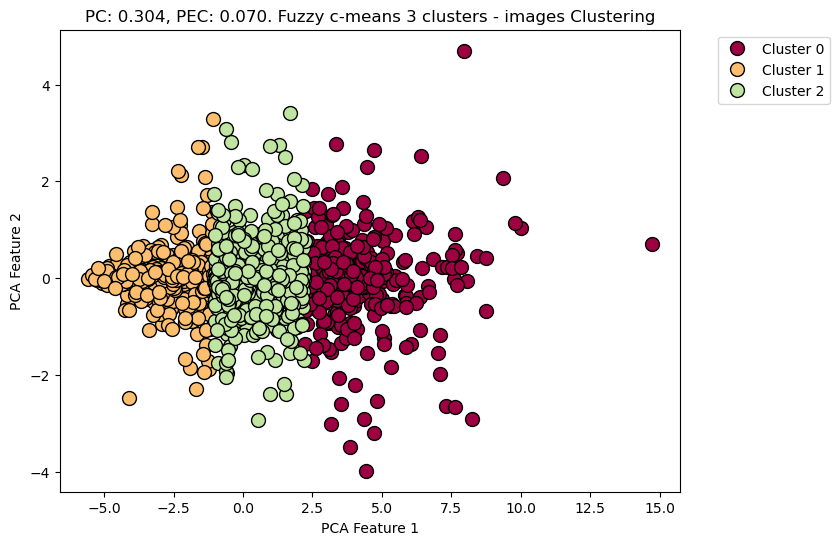

Best params for 4 clusters: {'max_iter': 50, 'm': 1.1, 'error': 0.01}
Best score 0.276181129041758
Performing clustering for 4 clusters


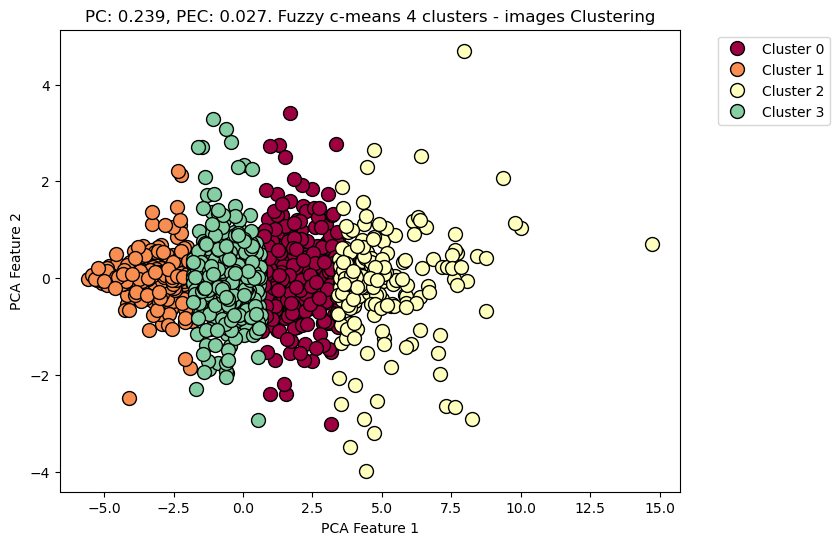

Best params for 9 clusters: {'max_iter': 100, 'm': 1.1, 'error': 0.01}
Best score 0.15420838555000538
Performing clustering for 9 clusters


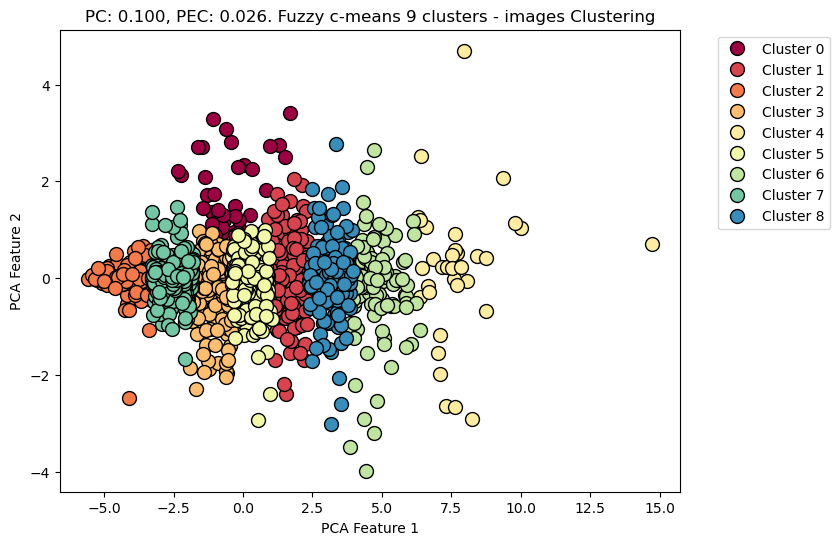

In [130]:
perform_c_means(pca_df, chosen_n_clusters_arr, 'arrays')
perform_c_means(pca_imgs_df, chosen_n_clusters_imgs, 'images')